# KARINA FRANCIELI SCHMIDT - 2023314

## Lecturer:  Muhammad 

# Machine learning

In [1]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler

Code below to read the dataframe file.

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

Below we can quickly visualise the data, the column names and the first rows

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


The '.shape' code shows the total number of rows and columns in the dataframe

In [4]:
print(df.shape)


(99457, 10)


Below are all the names of the columns that.

In [5]:
print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


With df.info() it shows a summary that includes information for each column, such as null values, and data type (int, float, object).
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


This code is for printing the number of missing values. In this dataset, we don't have any missing values, because all the columns have the value 0.

In [7]:
# Missing value
valores_faltantes = df.isnull().sum()

print(valores_faltantes)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


Below is a statistical summary to understand the distribution and dispersion of the numerical data in each column.

In [8]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Transfomaçao da coluna gender de object pra in (categorical to numerical) para poder fazer a leitura em ML

In [9]:
# Creating a gender mapping to numbers
gender_mapping = {'Female': 0, 'Male': 1}

# Applying the mapping to transform gender values into integers
df['gender_int'] = df['gender'].map(gender_mapping)

# Checking the transformations
df[['gender', 'gender_int']].head()

,gender,gender_int
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Female,0


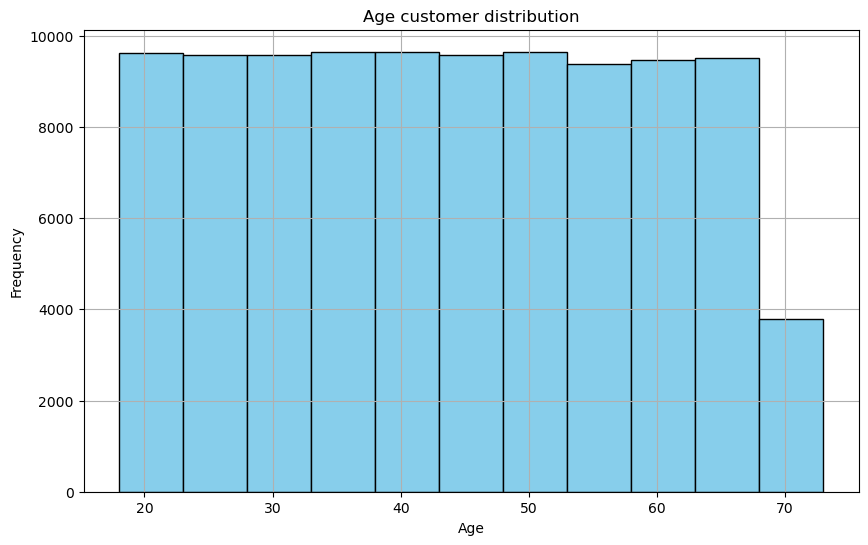

In [10]:
# Plotting the histogram of customer ages
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=range(min(df['age']), max(df['age']) + 5, 5), color='skyblue', edgecolor='black')
plt.title('Age customer distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Total sale stats by gender

In [11]:
# Calculating the total sales per purchase
df['total_sales'] = df['quantity'] * df['price']

# Grouping the data by gender and obtaining descriptive statistics
stats_by_gender = df.groupby('gender')['total_sales'].describe()

# Displaying the descriptive statistics
print(stats_by_gender)

          count         mean          std   min     25%     50%      75%  \
gender                                                                     
Female  59482.0  2525.253623  4226.617822  5.23  136.35  600.17  2700.72   
Male    39975.0  2534.050237  4216.352329  5.23  130.75  600.17  2700.72   

            max  
gender           
Female  26250.0  
Male    26250.0  


In [12]:
# Calculating the total sales per purchase
df['total_sales'] = df['quantity'] * df['price']

# Grouping the data by age and obtaining descriptive statistics
stats_by_age = df.groupby('age')['total_sales'].describe()

# Displaying the descriptive statistics
print(stats_by_age)

      count         mean          std   min       25%     50%      75%  \
age                                                                      
18   1844.0  2384.880835  3984.756235  5.23  136.3500  573.44  2700.72   
19   1936.0  2403.584003  3884.889153  5.23  141.6075  600.17  2700.72   
20   1844.0  2498.819875  4101.978243  5.23  130.7500  573.44  2700.72   
21   1947.0  2494.174838  4163.498999  5.23  143.3600  600.17  2700.72   
22   2051.0  2539.659391  4343.772540  5.23  143.3600  650.56  2700.72   
23   1897.0  2450.074544  4103.851863  5.23  130.7500  600.17  2700.72   
24   1977.0  2570.768791  4322.038140  5.23  130.7500  600.17  2700.72   
25   1863.0  2503.589630  4125.471617  5.23  136.3500  600.17  2700.72   
26   1896.0  2627.328492  4393.804554  5.23  130.7500  600.17  2700.72   
27   1950.0  2652.235415  4308.580655  5.23  136.3500  650.56  4200.00   
28   1953.0  2529.511224  4186.083347  5.23  136.3500  600.17  2700.72   
29   1885.0  2590.858790  4261.996393 

### Avarege sales per age

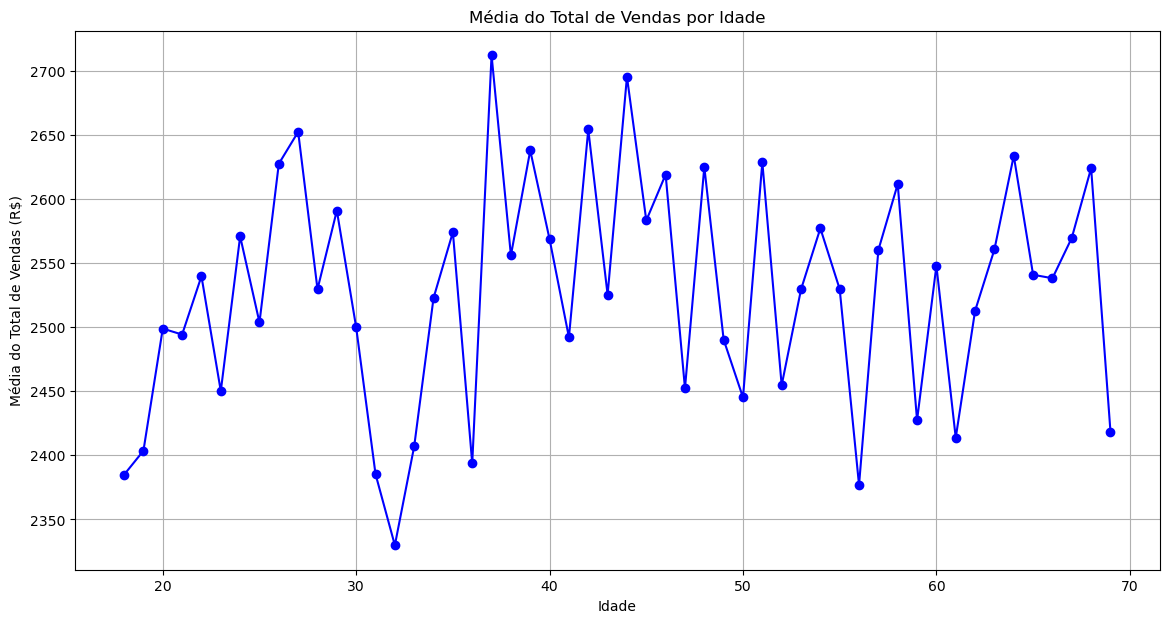

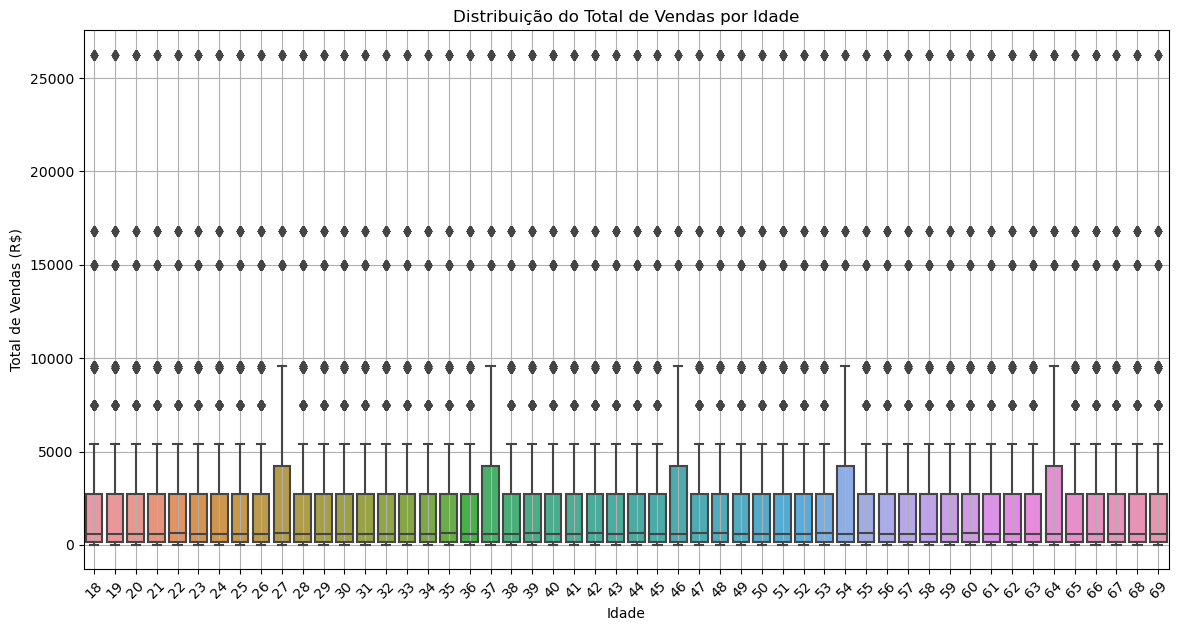

In [13]:

# Gráfico de Linha para Médias de Vendas por Idade
plt.figure(figsize=(14, 7))
plt.plot(stats_by_age.index, stats_by_age['mean'], marker='o', linestyle='-', color='b')
plt.title('Média do Total de Vendas por Idade')
plt.xlabel('Idade')
plt.ylabel('Média do Total de Vendas (R$)')
plt.grid(True)
plt.show()

# Boxplot para Distribuição do Total de Vendas por Idade
plt.figure(figsize=(14, 7))
sns.boxplot(x='age', y='total_sales', data=df)
plt.title('Distribuição do Total de Vendas por Idade')
plt.xlabel('Idade')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)
plt.show()

Gráfico de frequencia, onde  coloca em evidencia 

O histograma e as estatísticas descritivas mostram que não há vendas com valor zero no dataset. O valor mínimo de vendas é R$ 5,23, e os dados mostram uma distribuição com a média de vendas sendo R$ 2528,79 e a venda máxima atingindo R$ 26250,00. Isso confirma que os totais de vendas estão todos acima de zero.

Distribuição de Vendas: A maior frequência de vendas está nos valores mais baixos, com a frequência diminuindo à medida que o valor das vendas aumenta. Isso é típico em muitos contextos comerciais onde transações de menor valor são mais comuns do que transações de alto valor.
Forma da Distribuição: A distribuição é fortemente inclinada à direita, indicando que a maioria das vendas está concentrada nos valores menores, enquanto vendas de valores muito altos são menos frequentes.
Variação e Média: O valor médio das vendas é de R$ 2528,79, mas a distribuição mostra que a maioria das vendas individuais é muito menor que esse valor médio, sugerindo uma variação significativa no total de vendas.
Análise Estatística Descritiva
Mínimo: O menor valor de venda é R$ 5,23.
Máximo: O maior valor de venda é R$ 26.250,00.
Média: A média de vendas é de R$ 2528,79, indicando o ponto médio ponderado das vendas.
Mediana (50% quantil): A mediana das vendas é de R$ 600,17, o que significa que metade das vendas é menor que este valor e a outra metade é maior. A mediana é menos sensível a valores extremos (outliers) do que a média.
Quartis:
25% quantil: 25% das vendas são menores que R$ 136,35.
75% quantil: 75% das vendas são menores que R$ 2700,72.

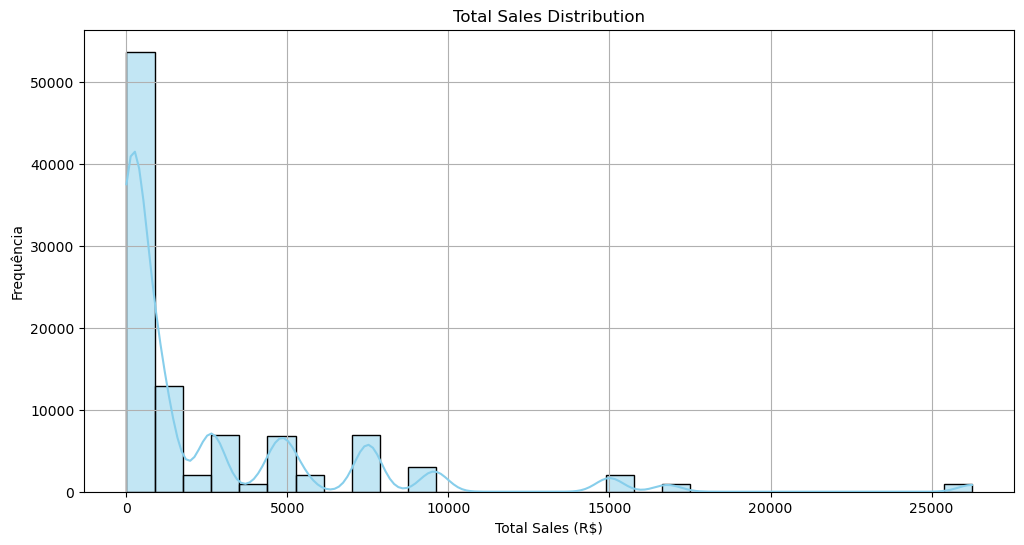

In [14]:
# Garantindo que o total de vendas está calculado
df['total_sales'] = df['quantity'] * df['price']

# Criando um histograma e um gráfico KDE para o total de vendas
plt.figure(figsize=(12, 6))
sns.histplot(df['total_sales'], kde=True, color='skyblue', bins=30, edgecolor='black')
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Total sale by gender

In [15]:
# Calculate the total sales per purchase
df['total_sales'] = df['quantity'] * df['price']

# Group the data by gender and calculate the total sales
total_sales_by_gender = df.groupby('gender')['total_sales'].sum()

The graph comparing total sales and gender shows that sales are higher among women.
For women approximately 140,000,000 while for men 100,0000,000.

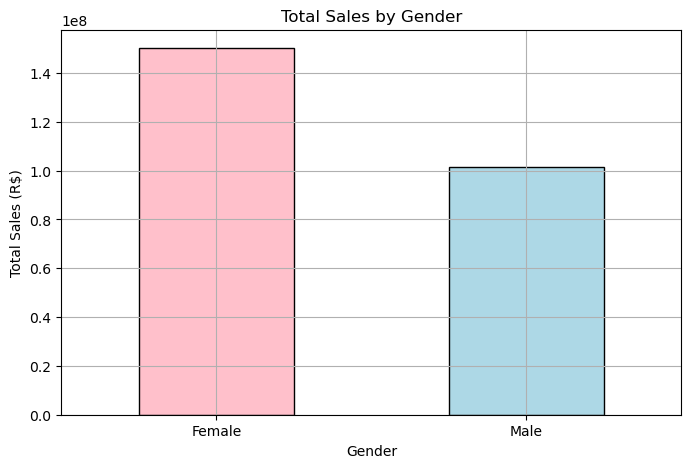

gender
Female    1.502071e+08
Male      1.012987e+08
Name: total_sales, dtype: float64

In [16]:
# Plotting the bar plot for total sales by gender
plt.figure(figsize=(8, 5))
total_sales_by_gender.plot(kind='bar', color=['pink', 'lightblue'], edgecolor='black')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (R$)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

total_sales_by_gender

### Frequancy by gender

Female    59482
Male      39975
Name: gender, dtype: int64


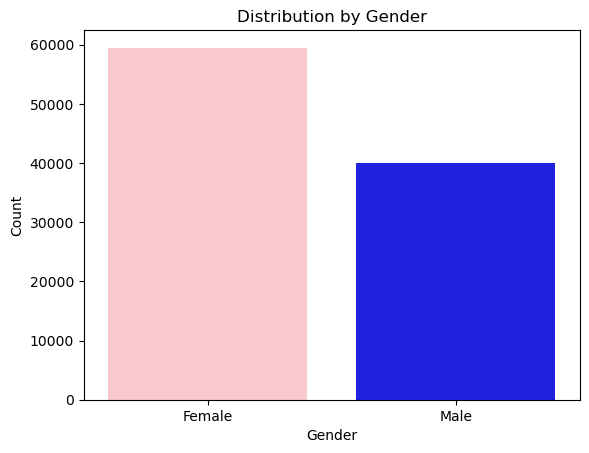

In [17]:
# First, displaying the count of values for gender
print(df.gender.value_counts())

# Now, creating the plot
sns.countplot(data=df, x='gender', palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Itens sold by gender

In [18]:
pd.crosstab(df.gender,df.category,values=((df['age'] <= 18) & (df['age'] < 40)),aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,66,386,165,155,101,56,52,98
Male,40,260,102,126,70,52,37,78


In [19]:
pd.crosstab(df.gender,df.category,values=((df['age'] >=40 ) & (df['age'] <=69)),aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,1679,11822,5257,5089,3469,1734,1688,3495
Male,1201,7992,3474,3357,2319,1128,1161,2262


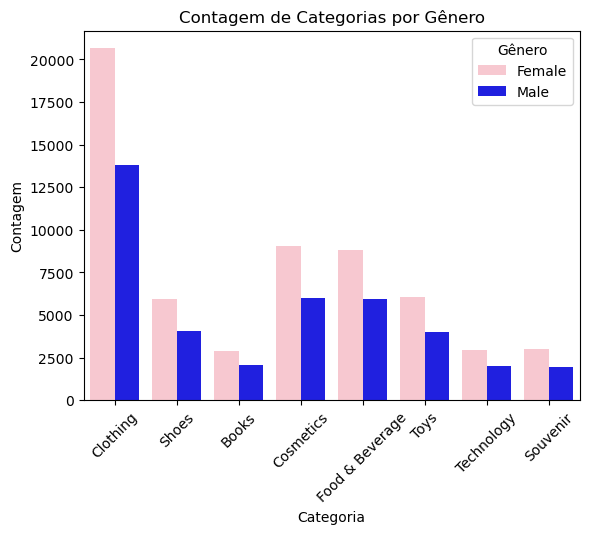

In [20]:
# Criando o gráfico
sns.countplot(data=df, x='category', hue='gender', palette={'Female': 'pink', 'Male': 'blue'})
plt.xticks(rotation=45)  # Ajusta o ângulo de rotação conforme necessário
plt.title('Contagem de Categorias por Gênero')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.show()


In [21]:
 # Calculate total sales
df['total_sales'] = df['quantity'] * df['price']  
grouped_data = df.groupby(['gender', 'category']).agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

# Extracting the top three items sold to female customers
top_items_female = grouped_data[(grouped_data['gender'] == 'Female')].nlargest(3, 'total_quantity')

print(top_items_female)

   gender         category  total_quantity  total_sales
1  Female         Clothing           62039  68251695.60
2  Female        Cosmetics           27261   4066772.54
3  Female  Food & Beverage           26362    505322.60


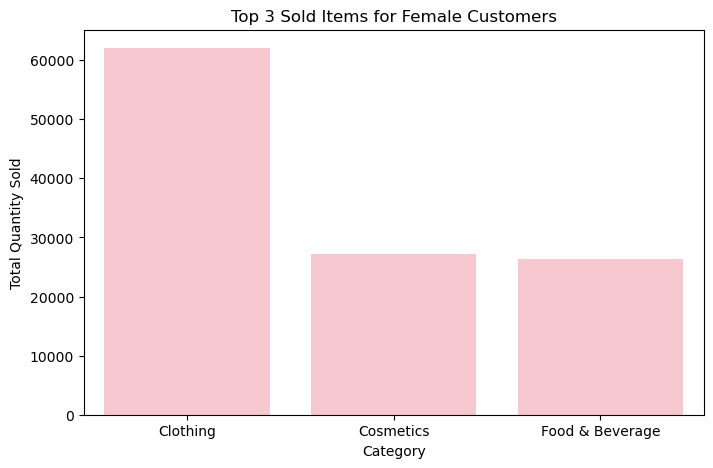

In [22]:
# Plotting the top 3 items for female customers
plt.figure(figsize=(8, 5))
sns.barplot(data=top_items_female, x='category', y='total_quantity', color='pink')
plt.title('Top 3 Sold Items for Female Customers')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

In [23]:
 # Calculate total sales
df['total_sales'] = df['quantity'] * df['price'] 
grouped_data = df.groupby(['gender', 'category']).agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

# Extracting the top three items sold to male customers
top_items_male = grouped_data[(grouped_data['gender'] == 'Male')].nlargest(3, 'total_quantity')

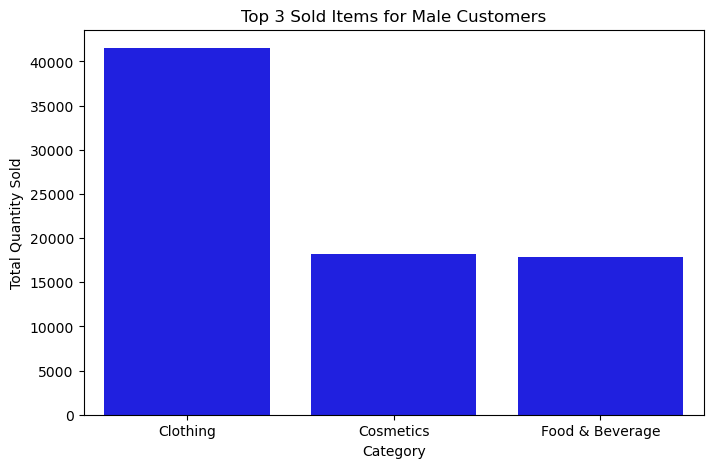

In [24]:
# Plotting the top 3 items for male customers
plt.figure(figsize=(8, 5))
sns.barplot(data=top_items_male, x='category', y='total_quantity', color='blue')
plt.title('Top 3 Sold Items for Male Customers')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

When analysing the data on the top 3 items bought by the different genres. We observed that both have a preference for the same items. However, the male gender has less preference when compared to the female gender. 
Which are represented in the graph above.

### Itens sold by age

In [25]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Create a new column in the DataFrame with the age range labels
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Use pd.crosstab to count occurrences of age ranges for each category
cross_tab = pd.crosstab(df['category'], df['AgeRange'])
cross_tab

AgeRange,0-20,21-30,31-40,41-50,51-60,61+
category,,,,,,
Books,289,964,946,952,966,864
Clothing,1974,6752,6627,6662,6548,5924
Cosmetics,825,2894,2950,2881,2934,2613
Food & Beverage,863,2824,2931,2812,2796,2550
Shoes,575,1954,1907,1944,1902,1752
Souvenir,277,974,992,930,975,851
Technology,252,991,1006,965,932,850
Toys,569,2047,1907,1920,1879,1765


In [26]:
df['total_sales'] = df['quantity'] * df['price']  # Calculate total sales

# Defining new age ranges
bins = [0, 21, 31, 41, 51, 61, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Grouping data by age range and category
grouped_by_age_category = df.groupby(['age_group', 'category']).agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

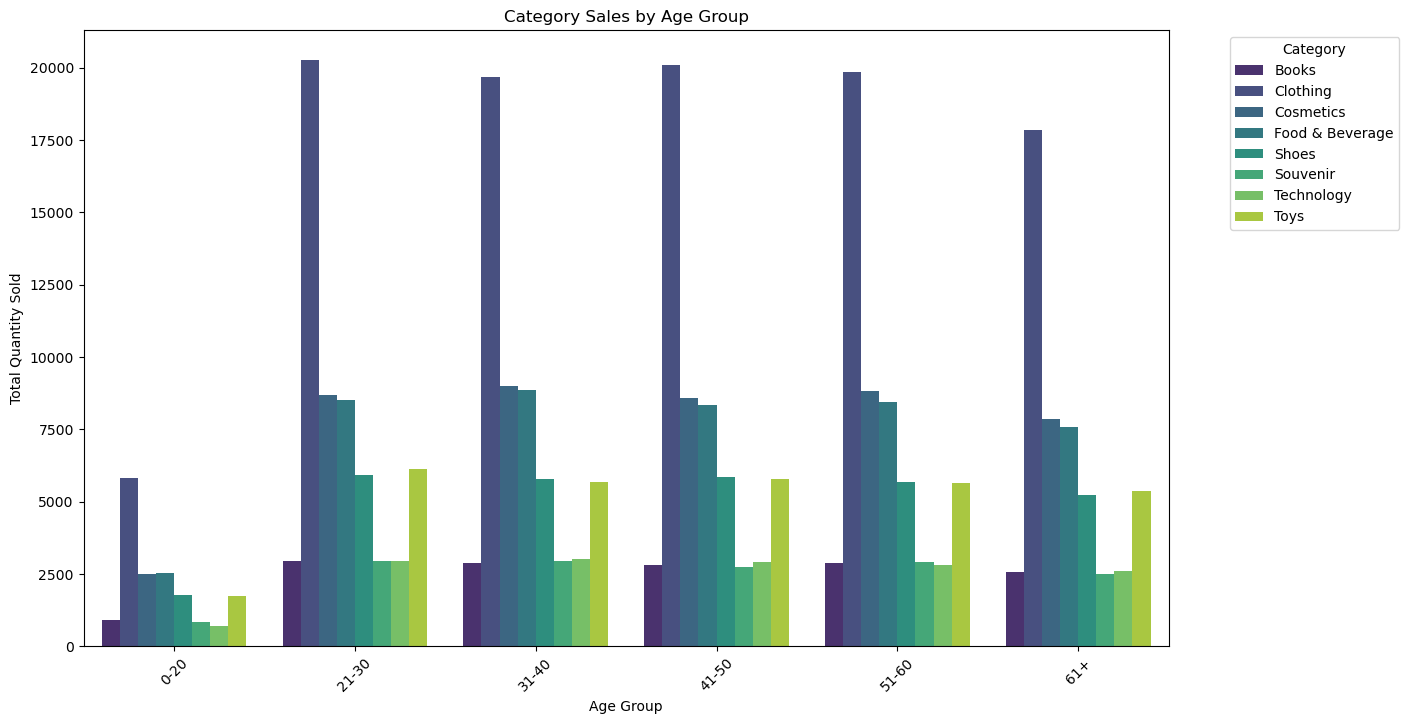

In [27]:
# Plotting items sold by age group and category
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_by_age_category, x='age_group', y='total_quantity', hue='category', palette='viridis')
plt.title('Category Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better visibility
plt.show()

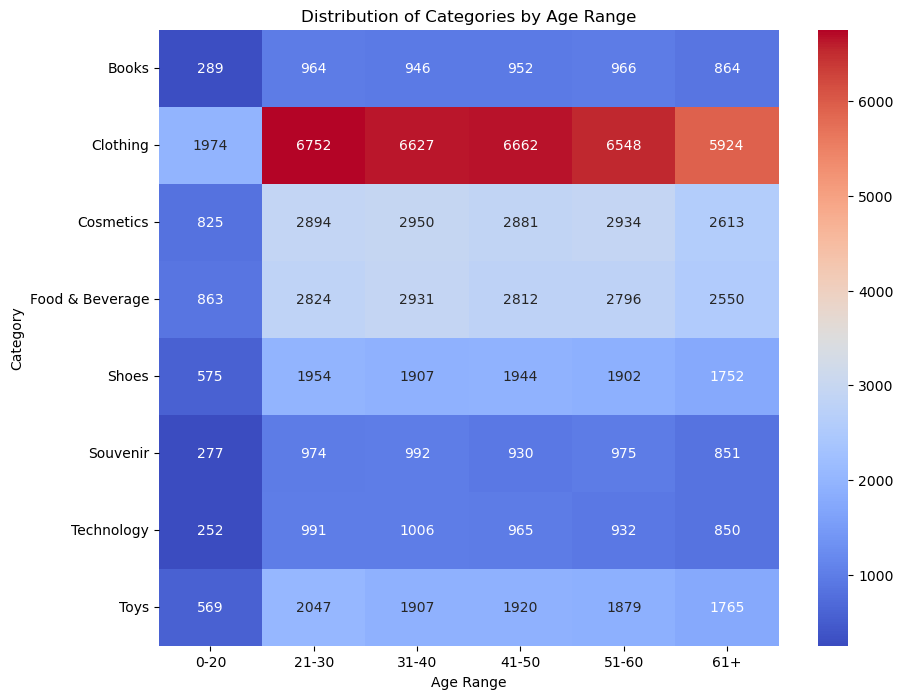

In [28]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Using pd.crosstab to count occurrences of age ranges for each category
cross_tab = pd.crosstab(df['category'], df['AgeRange'])

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Distribution of Categories by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Category')
plt.show()

### Itens sold by period

In [29]:
# Converter a coluna 'invoice_date' para datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Extrair o mês e o ano para uma nova coluna
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Calcular o total de vendas por mês (quantidade * preço)
df['total_sale'] = df['quantity'] * df['price']

# Agrupar os dados por mês e ano, e somar as vendas totais
monthly_sales = df.groupby('month_year')['total_sale'].sum().reset_index()

# Exibir os resultados
monthly_sales

,month_year,total_sale
0,2021-01,9641614.62
1,2021-02,8772315.22
2,2021-03,9455359.38
3,2021-04,9389541.54
4,2021-05,9771756.97
5,2021-06,9286271.35
6,2021-07,10311119.68
7,2021-08,9630655.70
8,2021-09,9188165.62
9,2021-10,10263015.06


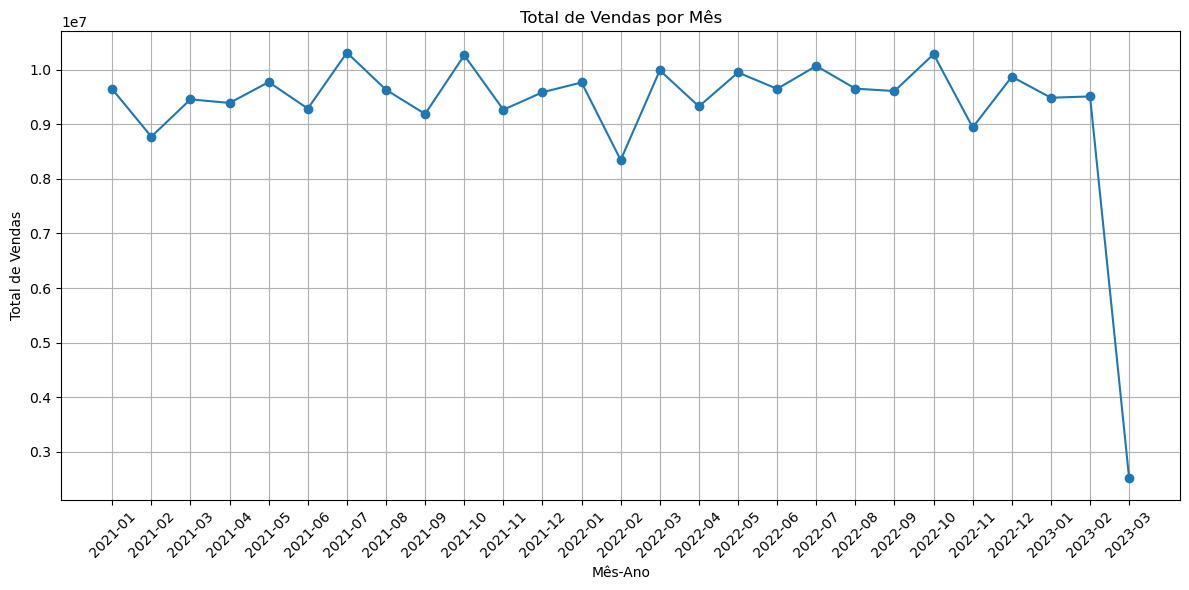

In [30]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['total_sale'], marker='o', linestyle='-')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês-Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

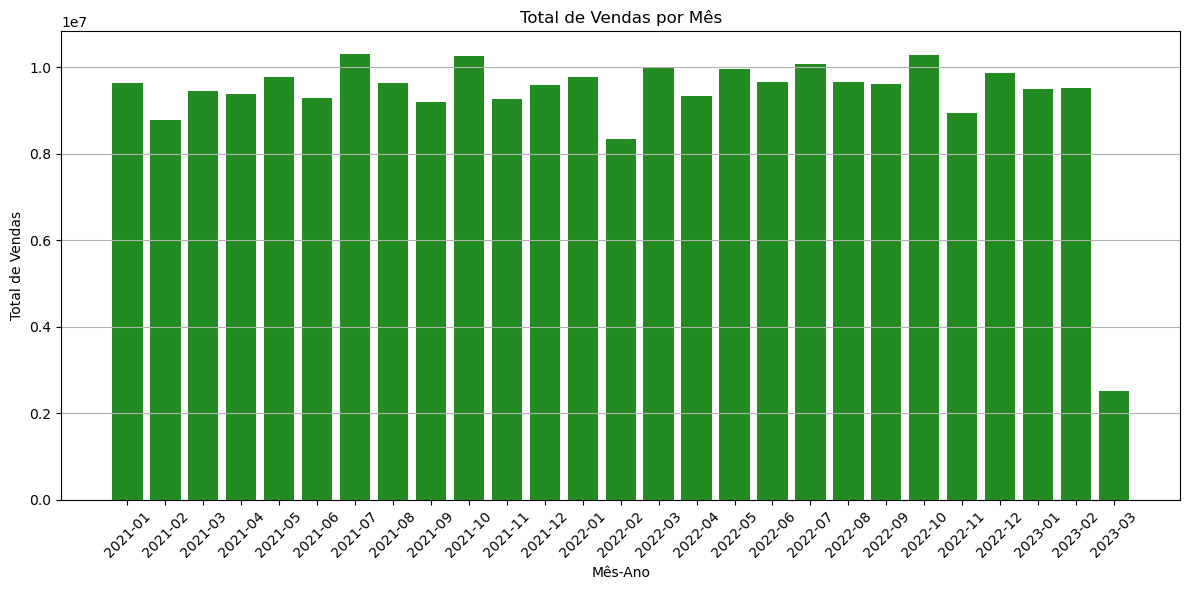

In [31]:
# Configurações do gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month_year'].astype(str), monthly_sales['total_sale'], color='forestgreen')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês-Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [32]:
# Extracting quarter from the invoice date
df['quarter'] = df['invoice_date'].dt.to_period('Q')

# Group the data by quarter, summing up the 'quantity'
quarterly_sales = df.groupby('quarter').agg(total_quantity=('quantity', 'sum')).reset_index()


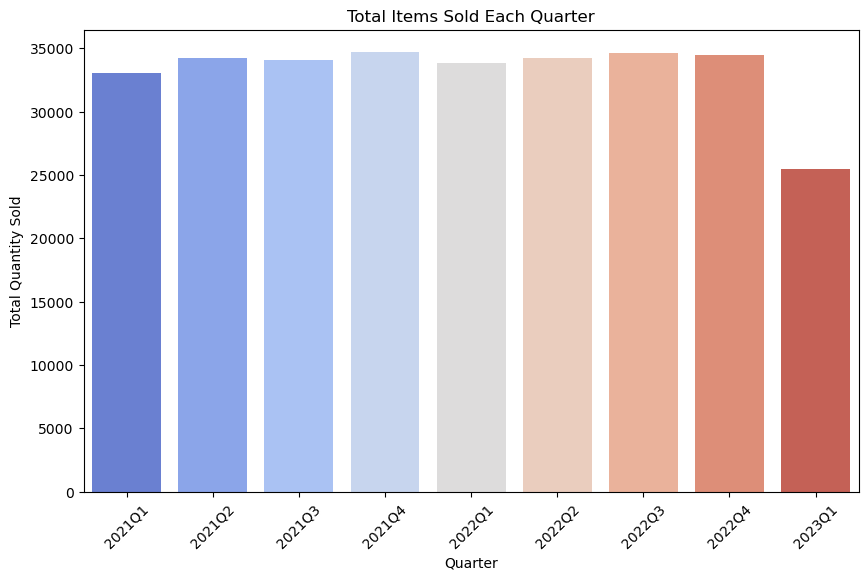

In [33]:
# Plotting the data using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_sales, x='quarter', y='total_quantity', palette='coolwarm')
plt.title('Total Items Sold Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better visibility
plt.show()

### Payments methods

Most of the payment methods chosen by customers are cash, followed by credit cards, and finally debit cards.

In [34]:
payment_methoud=df.payment_method.value_counts()
payment_methoud

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

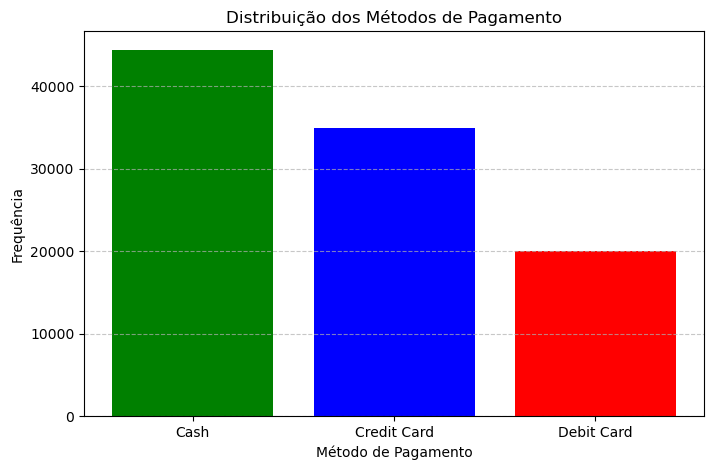

In [35]:
# Dados de métodos de pagamento
payment_methods = ['Cash', 'Credit Card', 'Debit Card']
counts = [44447, 34931, 20079]

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(payment_methods, counts, color=['green', 'blue', 'red'])
plt.title('Distribuição dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()

When we separate the types of payment by age, we see that from the age of 21, there is a pattern. The preference is for cash, followed by credit card and then debit card.

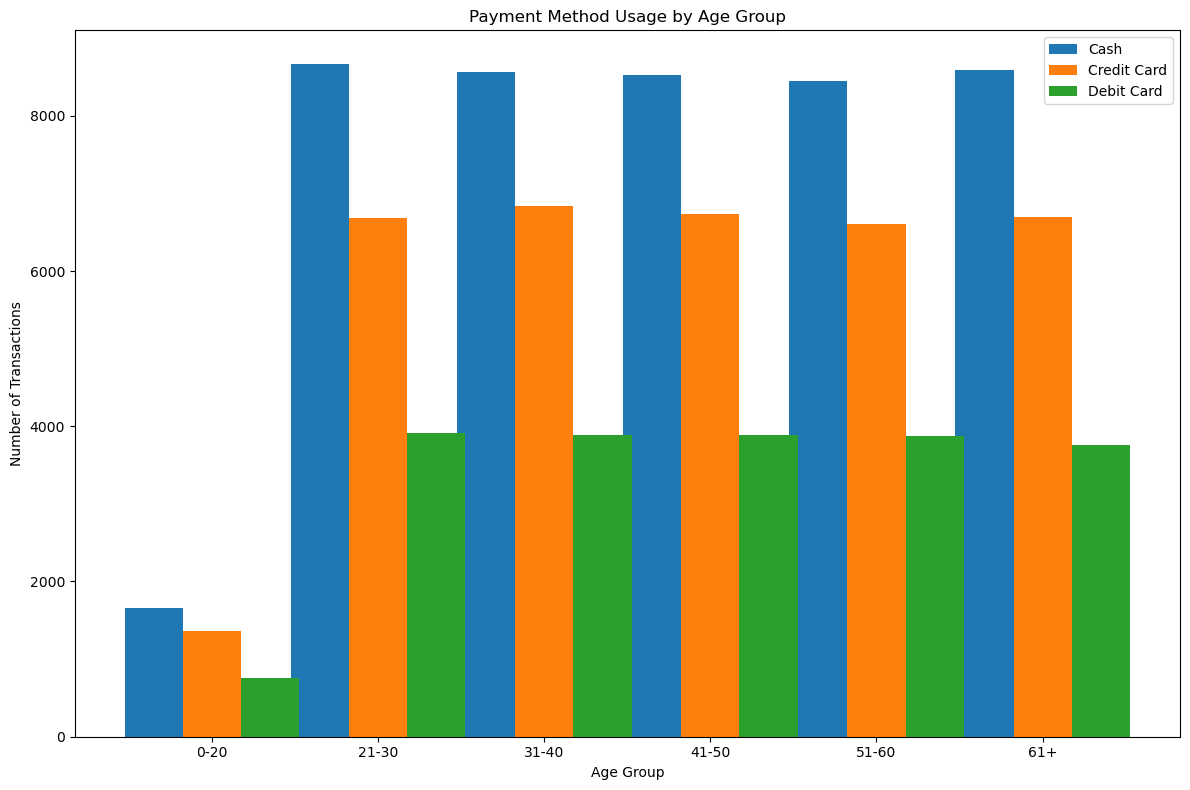

In [36]:
# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and 'payment_method', then count the occurrences
age_payment_grouped = df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')

# Pivot this data to have age groups as indices, payment methods as columns, and counts as values
pivot_table = age_payment_grouped.pivot(index='age_group', columns='payment_method', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
age_groups = pivot_table.index
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Dynamically create bars for each payment method
for i, payment_method in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[payment_method], width, label=payment_method)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Payment Method Usage by Age Group')
ax.set_xticks(x + width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(age_groups)
ax.legend()

# Improve layout
fig.tight_layout()

# Show the plot
plt.show()

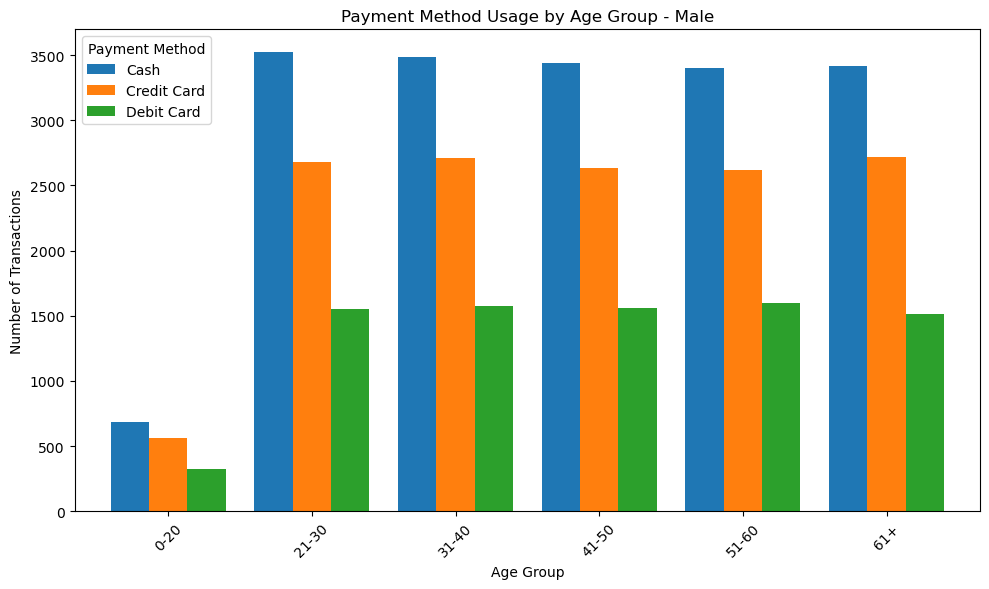

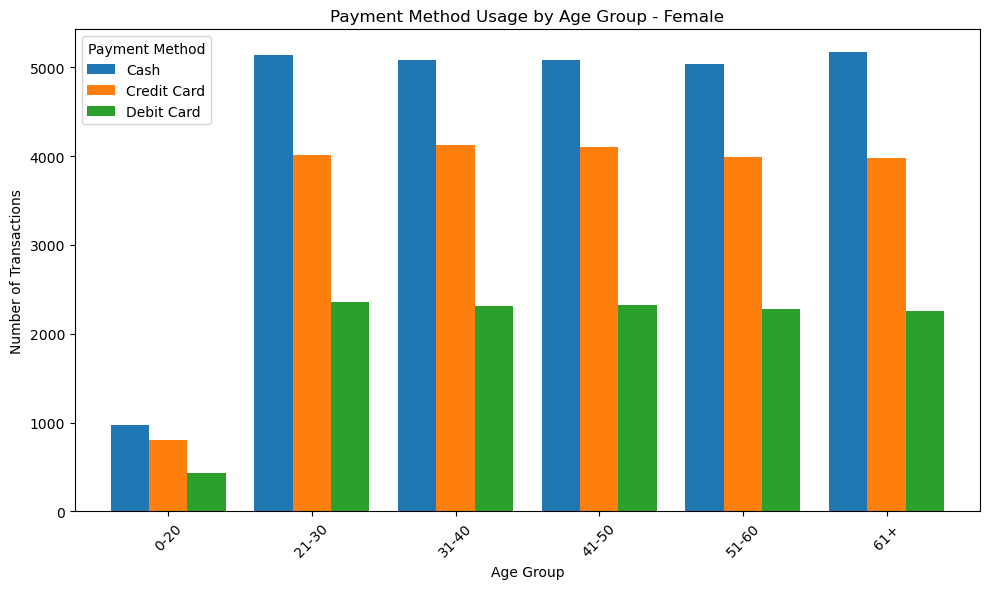

In [37]:

# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Focus on payment methods of interest
payment_methods = ['Credit Card', 'Cash', 'Debit Card']

# Filter data for the specified payment methods
df = df[df['payment_method'].isin(payment_methods)]

# Create separate dataframes for each gender
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']

# Function to plot payment method by age group for a given gender data
def plot_payment_distribution(gender_df, gender):
    # Group by 'age_group' and 'payment_method', then count the occurrences
    grouped = gender_df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')
    pivot = grouped.pivot(index='age_group', columns='payment_method', values='count').fillna(0)
    
    # Plotting
    pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Payment Method Usage by Age Group - {gender}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Transactions')
    plt.legend(title='Payment Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each gender
plot_payment_distribution(male_df, 'Male')
plot_payment_distribution(female_df, 'Female')

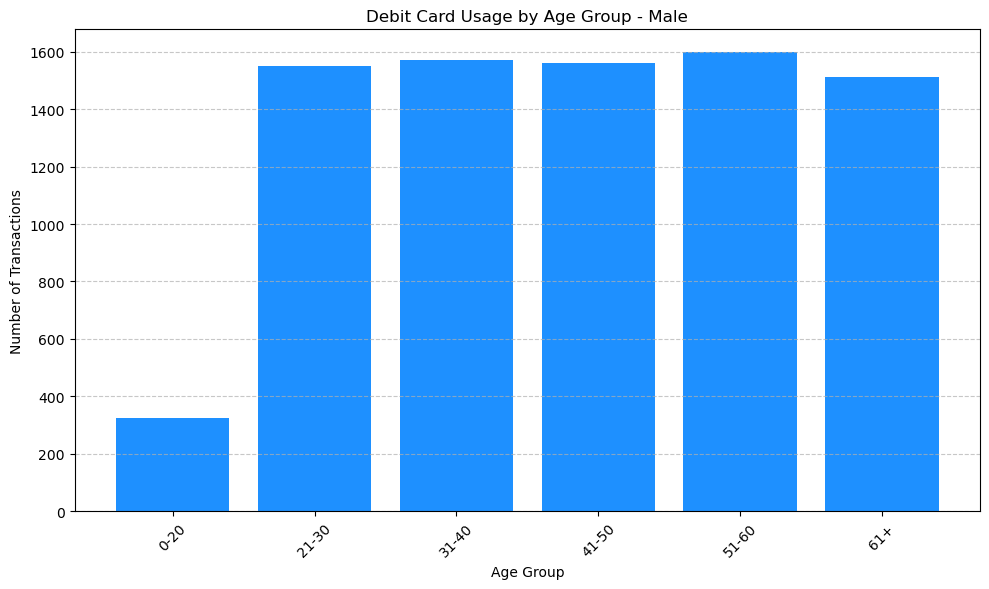

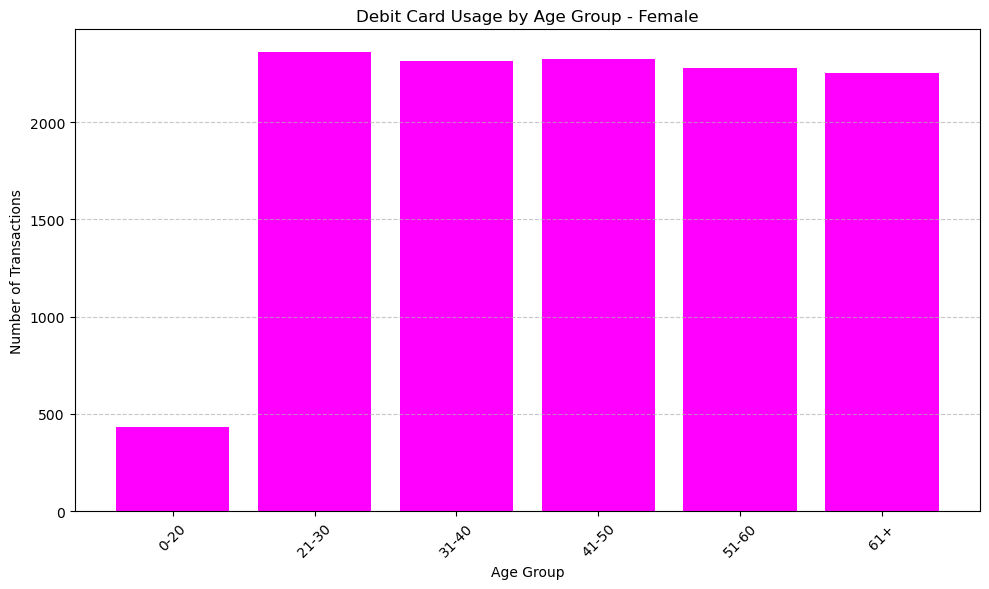

In [38]:
# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter data to only include debit card transactions
debit_card_df = df[df['payment_method'] == 'Debit Card']

# Create separate dataframes for each gender
male_df = debit_card_df[debit_card_df['gender'] == 'Male']
female_df = debit_card_df[debit_card_df['gender'] == 'Female']

# Function to plot debit card usage by age group for a given gender
def plot_debit_card_usage(gender_data, gender):
    # Group by 'age_group' and count the occurrences
    grouped = gender_data.groupby(['age_group']).size().reset_index(name='count')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(grouped['age_group'], grouped['count'], color='dodgerblue' if gender == 'Male' else 'magenta')
    plt.title(f'Debit Card Usage by Age Group - {gender}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for each gender
plot_debit_card_usage(male_df, 'Male')
plot_debit_card_usage(female_df, 'Female')

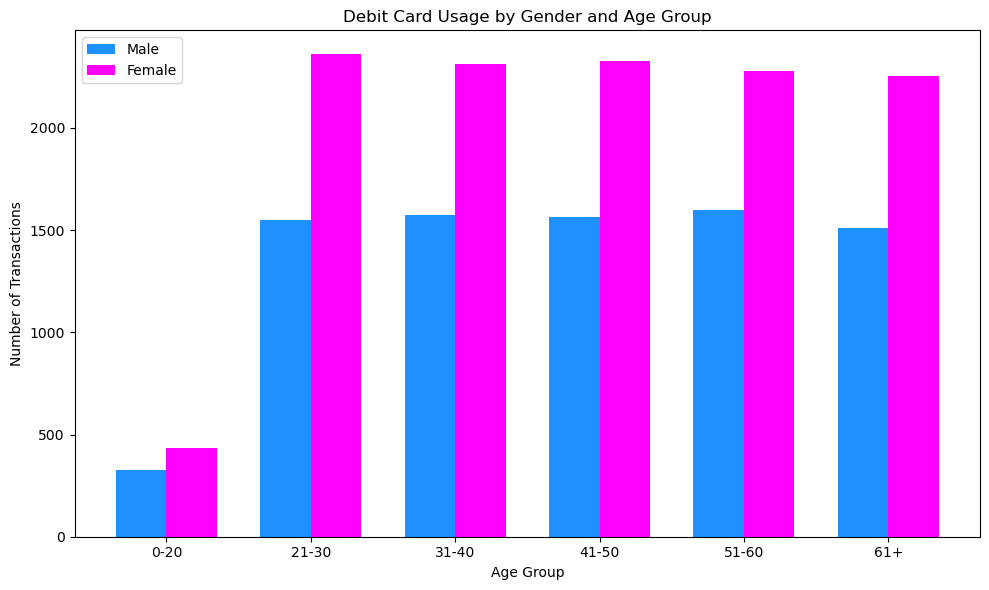

In [39]:

# Filter data to only include debit card transactions
debit_card_df = df[df['payment_method'] == 'Debit Card']

# Group by 'age_group' and 'gender', then count the occurrences
grouped = debit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Pivot the data to have age groups as indices and genders as columns
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

# Creating bars for each gender
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

# Customize the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Debit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

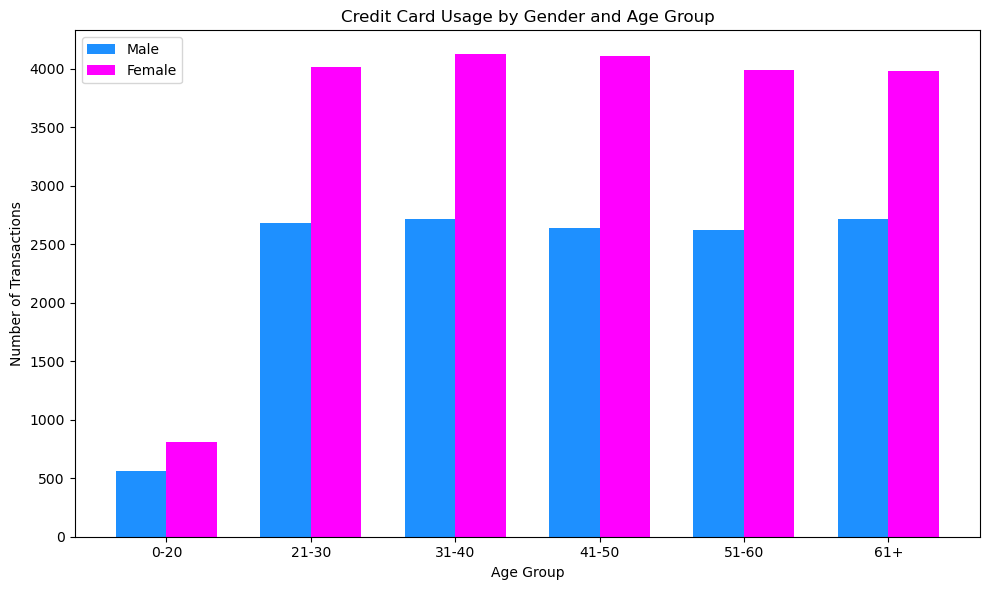

In [40]:

# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter data to only include credit card transactions
credit_card_df = df[df['payment_method'] == 'Credit Card']

# Group by 'age_group' and 'gender', then count the occurrences
grouped = credit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Pivot the data to have age groups as indices and genders as columns
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

# Creating bars for each gender
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

# Customize the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Credit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
#Defining bins
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#Filtereing by Payment method
credit_card_df = df[df['payment_method'] == 'Credit Card']

#Grouping data
grouped = credit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

#Pivoting data
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

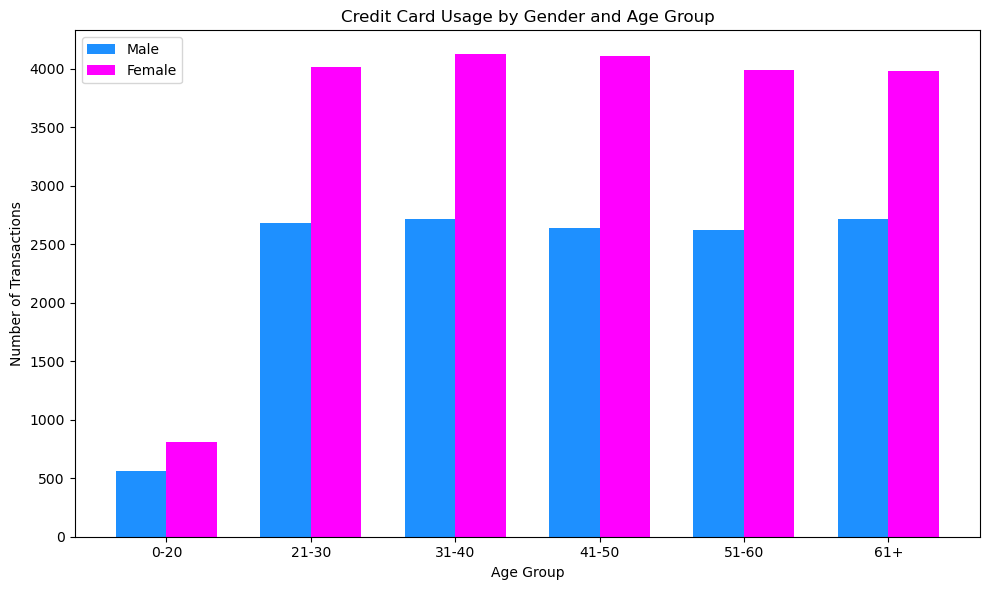

In [42]:
#Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Credit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

The percentage of sales to women is 19.6% higher than to men.

In [43]:
# Count the number of transactions for each gender
gender_counts = df['gender'].value_counts()

# Calculate the percentage difference
if 'Male' in gender_counts and 'Female' in gender_counts:
    total_purchases = gender_counts.sum()
    male_percentage = (gender_counts['Male'] / total_purchases) * 100
    female_percentage = (gender_counts['Female'] / total_purchases) * 100
    difference_percentage = abs(male_percentage - female_percentage)
    print(f"Male Purchase Percentage: {male_percentage:.2f}%")
    print(f"Female Purchase Percentage: {female_percentage:.2f}%")
    print(f"Percentage Difference in Purchases Between Genders: {difference_percentage:.2f}%")
else:
    print("Gender data may be missing or incorrect.")

Male Purchase Percentage: 40.19%
Female Purchase Percentage: 59.81%
Percentage Difference in Purchases Between Genders: 19.61%


### Sales by shopping mall

In [44]:
# Calcular o total de vendas por item (quantidade * preço)
df['total_sale'] = df['quantity'] * df['price']

# Agrupar os dados por shopping mall e somar as vendas totais
mall_sales = df.groupby('shopping_mall')['total_sale'].sum().reset_index()

# Ordenar os resultados para ver o shopping com maior volume de vendas
mall_sales_sorted = mall_sales.sort_values(by='total_sale', ascending=False)

# Exibir os resultados
mall_sales_sorted

,shopping_mall,total_sale
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


Mall of Istanbul" is the shopping mall with the highest sales volume, closely followed by "Kanyon".

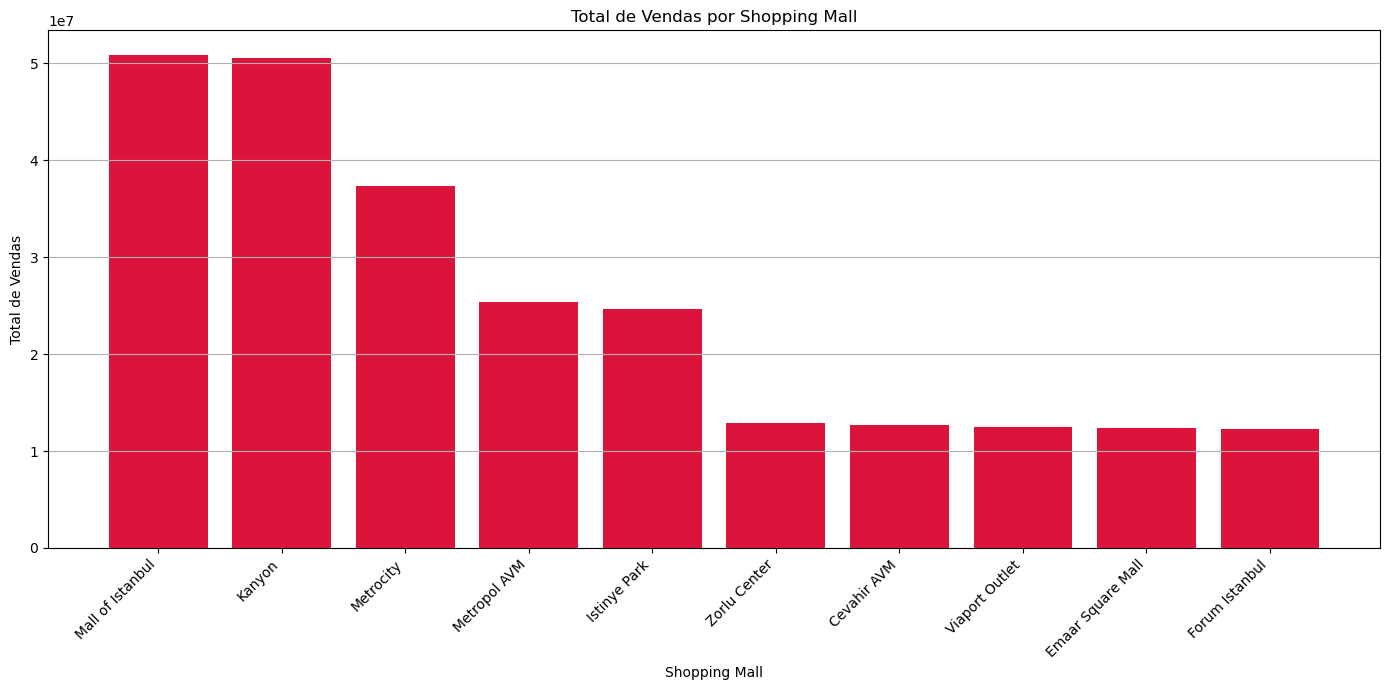

In [45]:
# Configurações do gráfico de barras para vendas por shopping mall
plt.figure(figsize=(14, 7))
plt.bar(mall_sales_sorted['shopping_mall'], mall_sales_sorted['total_sale'], color='crimson')
plt.title('Total de Vendas por Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [46]:
# Calcular o total de vendas por item (quantidade * preço)
df['total_sale'] = df['quantity'] * df['price']

# Criar faixas etárias usando pd.cut para categorizar as idades
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Definir os limites das faixas
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Agrupar os dados por shopping mall e faixa etária, e somar as vendas totais
sales_by_age_mall = df.groupby(['shopping_mall', 'age_group'])['total_sale'].sum().unstack(fill_value=0)

# Exibir os resultados
sales_by_age_mall

age_group,0-18,19-25,26-35,36-45,46-55,56-65,66-100
shopping_mall,,,,,,,
Cevahir AVM,0.0,1664351.53,2522439.02,2428486.81,2482859.54,2372138.64,1174862.66
Emaar Square Mall,0.0,1726248.08,2232306.95,2733462.67,2176061.05,2437226.57,1100794.97
Forum Istanbul,0.0,1559004.11,2474532.28,2348478.85,2358697.96,2185508.65,1377699.39
Istinye Park,0.0,3095104.71,4522268.61,4887413.37,5049685.87,4491194.27,2573160.85
Kanyon,0.0,6968564.00,9099764.49,10406256.83,9673112.69,9636923.87,4769609.22
Mall of Istanbul,0.0,6861248.79,9521269.27,10136170.90,9539940.89,10166281.49,4647570.34
Metrocity,0.0,4847601.30,7526255.90,7053751.36,7290294.95,7023341.25,3561542.57
Metropol AVM,0.0,3336741.10,5077895.34,5122245.71,4815972.56,4528360.25,2498698.23
Viaport Outlet,0.0,1766856.75,2421931.45,2376057.86,2360805.06,2477077.10,1118611.50


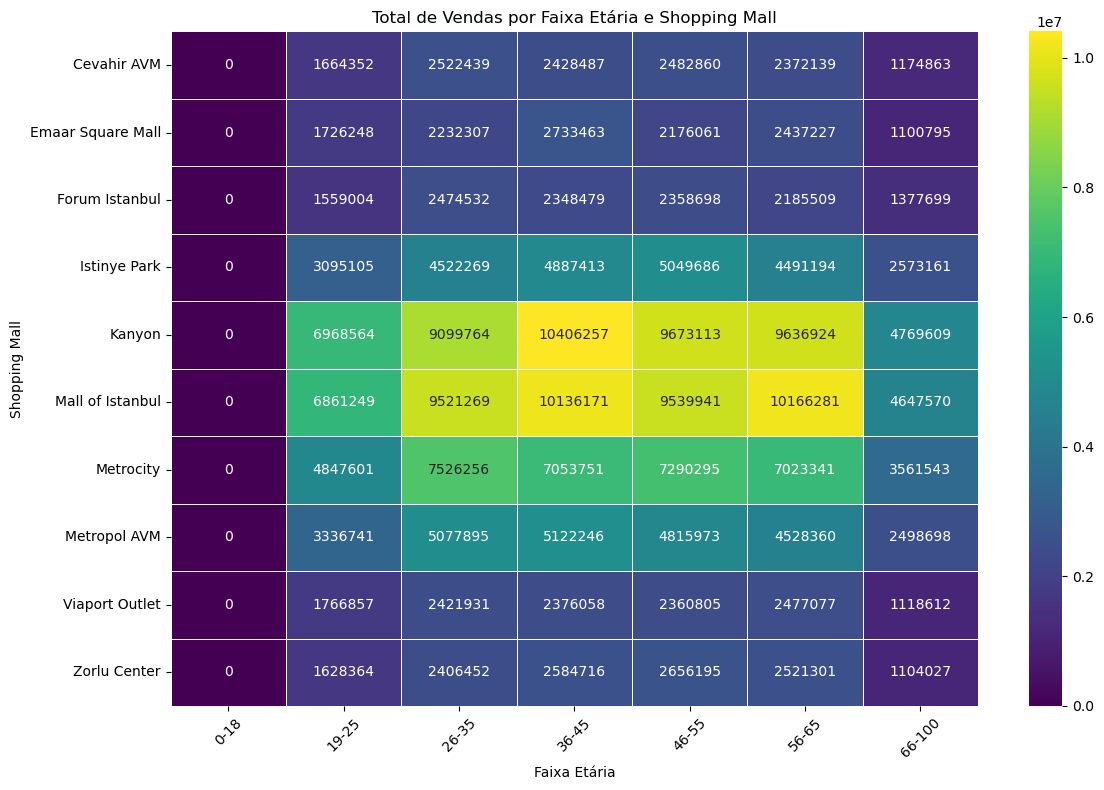

In [47]:
# Configurar o gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_age_mall, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Total de Vendas por Faixa Etária e Shopping Mall')
plt.xlabel('Faixa Etária')
plt.ylabel('Shopping Mall')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Aqui estão os shoppings que mais venderam em cada faixa etária:

19-25 anos: Kanyon, com um total de vendas de R$ 6,968,564.
26-35 anos: Mall of Istanbul, com um total de vendas de R$ 9,521,269.
36-45 anos: Kanyon, com um total de vendas de R$ 10,406,257.
46-55 anos: Kanyon, com um total de vendas de R$ 9,673,113.
56-65 anos: Mall of Istanbul, com um total de vendas de R$ 10,166,282.
66-100 anos: Kanyon, com um total de vendas de R$ 4,769,609.
Observação: A faixa etária de 0-18 anos não teve vendas registradas em nenhum shopping, portanto, foi omitida na análise.

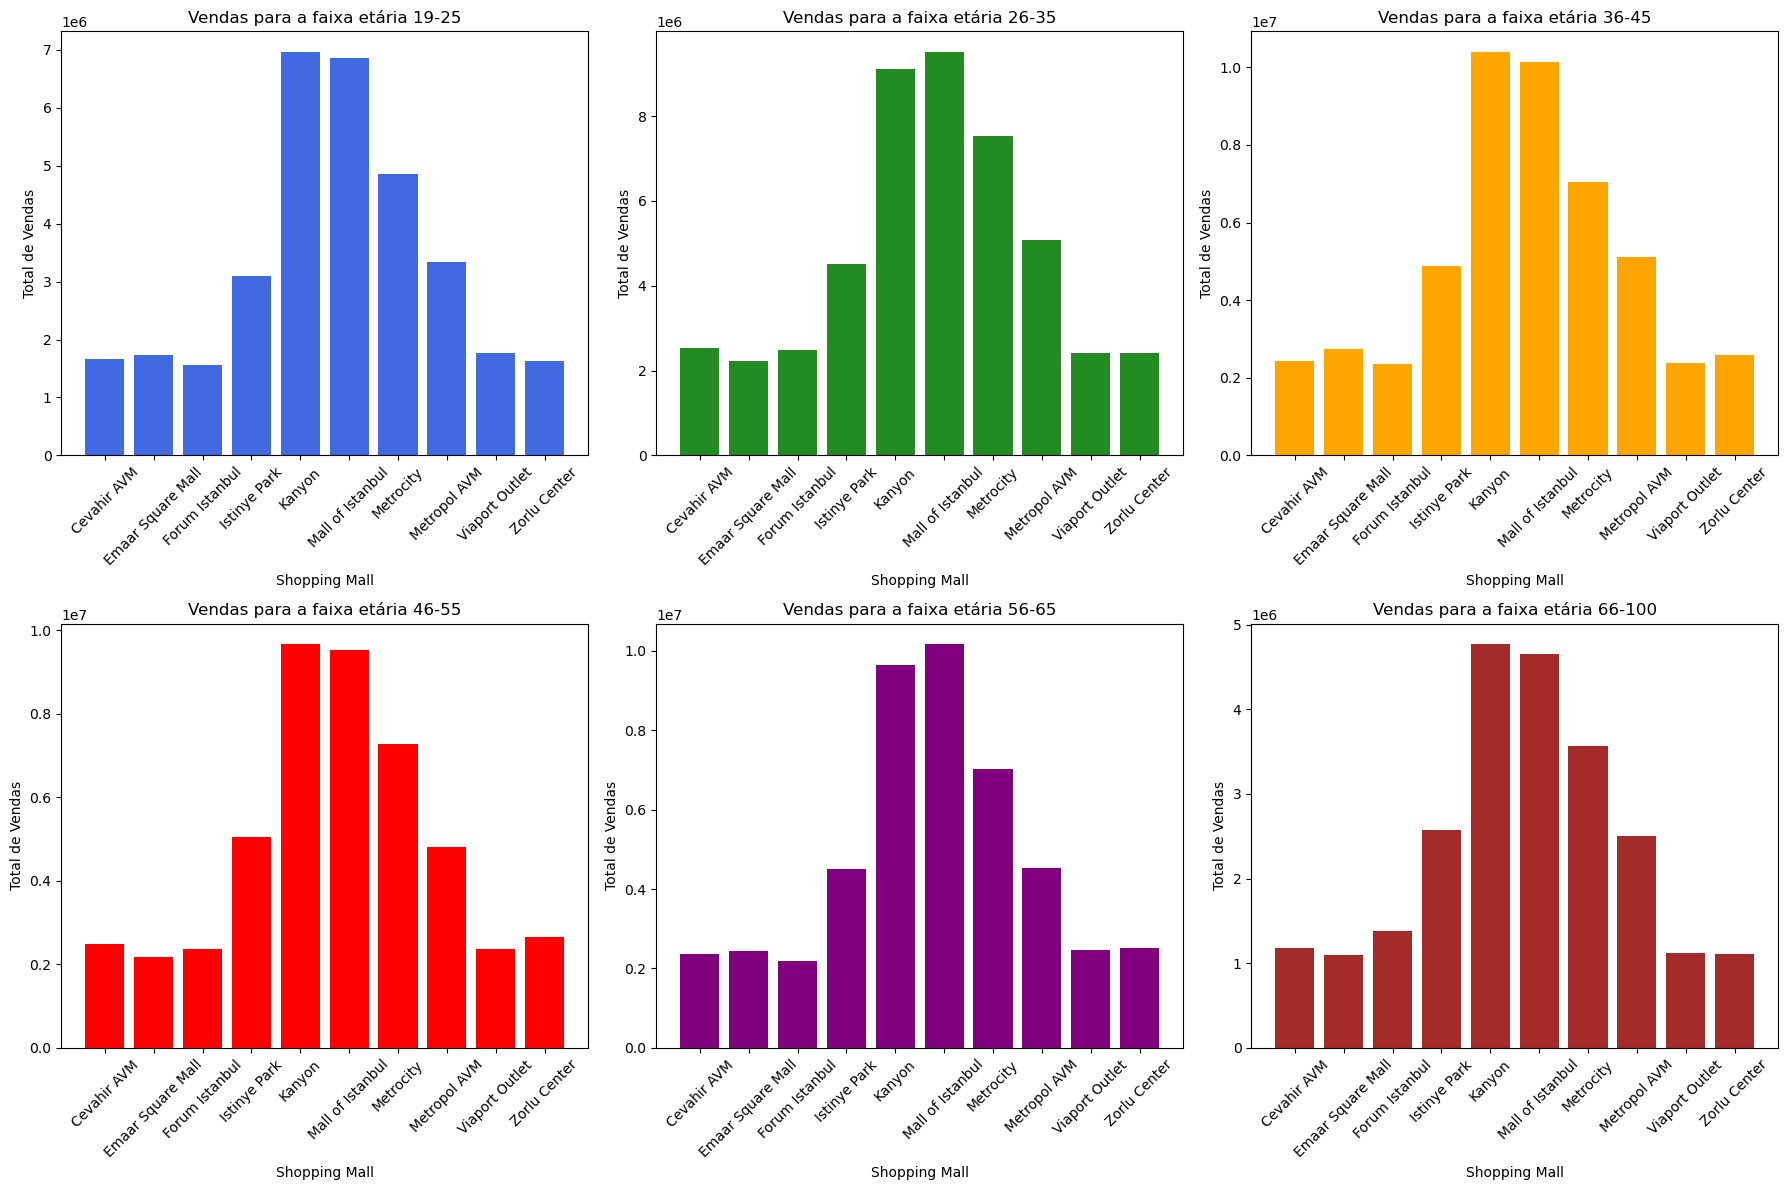

In [48]:
# Lista das faixas etárias e suas respectivas cores
age_groups = ['19-25', '26-35', '36-45', '46-55', '56-65', '66-100']
colors = ['royalblue', 'forestgreen', 'orange', 'red', 'purple', 'brown']

# Definir quantas linhas e colunas de gráficos você deseja
n_rows = 2  # Número de linhas
n_cols = 3  # Número de colunas

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))  # Ajuste o tamanho conforme necessário

# Iterar sobre os grupos de idade e criar um gráfico para cada um
for index, (age_group, ax) in enumerate(zip(age_groups, axes.flatten())):
    ax.bar(sales_by_age_mall.index, sales_by_age_mall[age_group], color=colors[index])
    ax.set_title(f'Vendas para a faixa etária {age_group}')
    ax.set_xlabel('Shopping Mall')
    ax.set_ylabel('Total de Vendas')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

## Most sold item based on Quantity

In [49]:
# Criar uma nova tabela pivot que soma a quantidade pedida para cada categoria em cada shopping mall
most_sold_items_per_mall = df.pivot_table(index=['shopping_mall', 'category'], values='quantity', aggfunc='sum').sort_values(by='quantity', ascending=False)

# Mostrando os itens mais vendidos por shopping mall
most_sold_items_per_mall

,,quantity
shopping_mall,category,
Mall of Istanbul,Clothing,20813
Kanyon,Clothing,20513
Metrocity,Clothing,15729
Metropol AVM,Clothing,10552
Istinye Park,Clothing,10165
...,...,...
Viaport Outlet,Books,720
Zorlu Center,Souvenir,716
Cevahir AVM,Souvenir,708


C:\Users\karik\AppData\Local\Temp\ipykernel_14960\3345536367.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_10_items = most_sold_items_per_mall.groupby('shopping_mall').apply(lambda x: x.nlargest(10, 'quantity')).reset_index(drop=True)


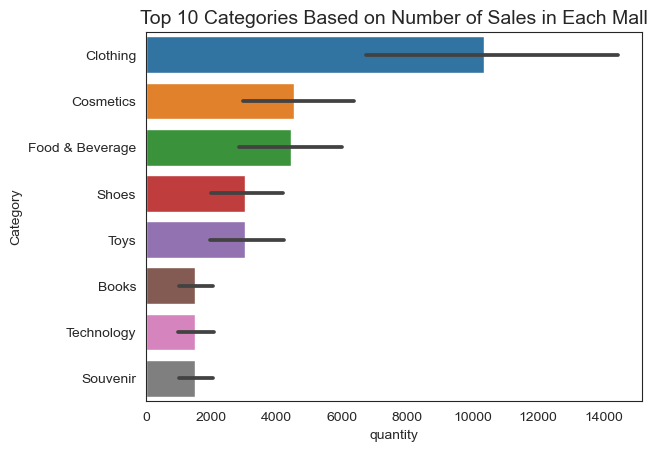

In [50]:
# Resetando o índice do DataFrame para tornar 'shopping_mall' e 'category' em colunas
most_sold_items_per_mall.reset_index(inplace=True)

# Configurando o estilo do gráfico
sns.set_style('white')

# Criando um gráfico de barras das categorias mais vendidas
# Plotando apenas as 10 categorias mais pedidas em cada shopping
top_10_items = most_sold_items_per_mall.groupby('shopping_mall').apply(lambda x: x.nlargest(10, 'quantity')).reset_index(drop=True)
sns.barplot(y='category', x='quantity', data=top_10_items)

# Adicionando um título adequado ao gráfico
plt.title('Top 10 Categories Based on Number of Sales in Each Mall', fontsize=14)

# Definindo o label do eixo Y
plt.ylabel('Category')

# Mostrar o gráfico
plt.show()

In [51]:
# Create a pivot table with customers as rows, categories as columns, and sum of quantities as values
user_item_matrix = df.pivot_table(index='customer_id', columns='category', values='quantity', aggfunc='sum', fill_value=0)

# Display the created pivot table
user_item_matrix.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
customer_id,,,,,,,,
C100004,0,5,0,0,0,0,0,0
C100005,0,0,0,0,2,0,0,0
C100006,0,0,0,0,0,0,0,3
C100012,0,0,0,5,0,0,0,0
C100019,0,0,0,0,0,0,0,1


### Most items sold in each shoppoing

In [52]:
# Calcular o total de vendas por item
df['total_sales'] = df['quantity'] * df['price']

# Agrupar os dados por shopping mall e categoria e somar as vendas
sales_by_mall_category = df.groupby(['shopping_mall', 'category'])['total_sales'].sum()

# Identificar a categoria com maior venda para cada shopping mall
top_category_by_mall = sales_by_mall_category.groupby(level=0).idxmax()

# Exibir a categoria mais vendida para cada shopping mall
print(top_category_by_mall)

shopping_mall
Cevahir AVM                (Cevahir AVM, Clothing)
Emaar Square Mall    (Emaar Square Mall, Clothing)
Forum Istanbul          (Forum Istanbul, Clothing)
Istinye Park              (Istinye Park, Clothing)
Kanyon                          (Kanyon, Clothing)
Mall of Istanbul      (Mall of Istanbul, Clothing)
Metrocity                    (Metrocity, Clothing)
Metropol AVM              (Metropol AVM, Clothing)
Viaport Outlet          (Viaport Outlet, Clothing)
Zorlu Center              (Zorlu Center, Clothing)
Name: total_sales, dtype: object


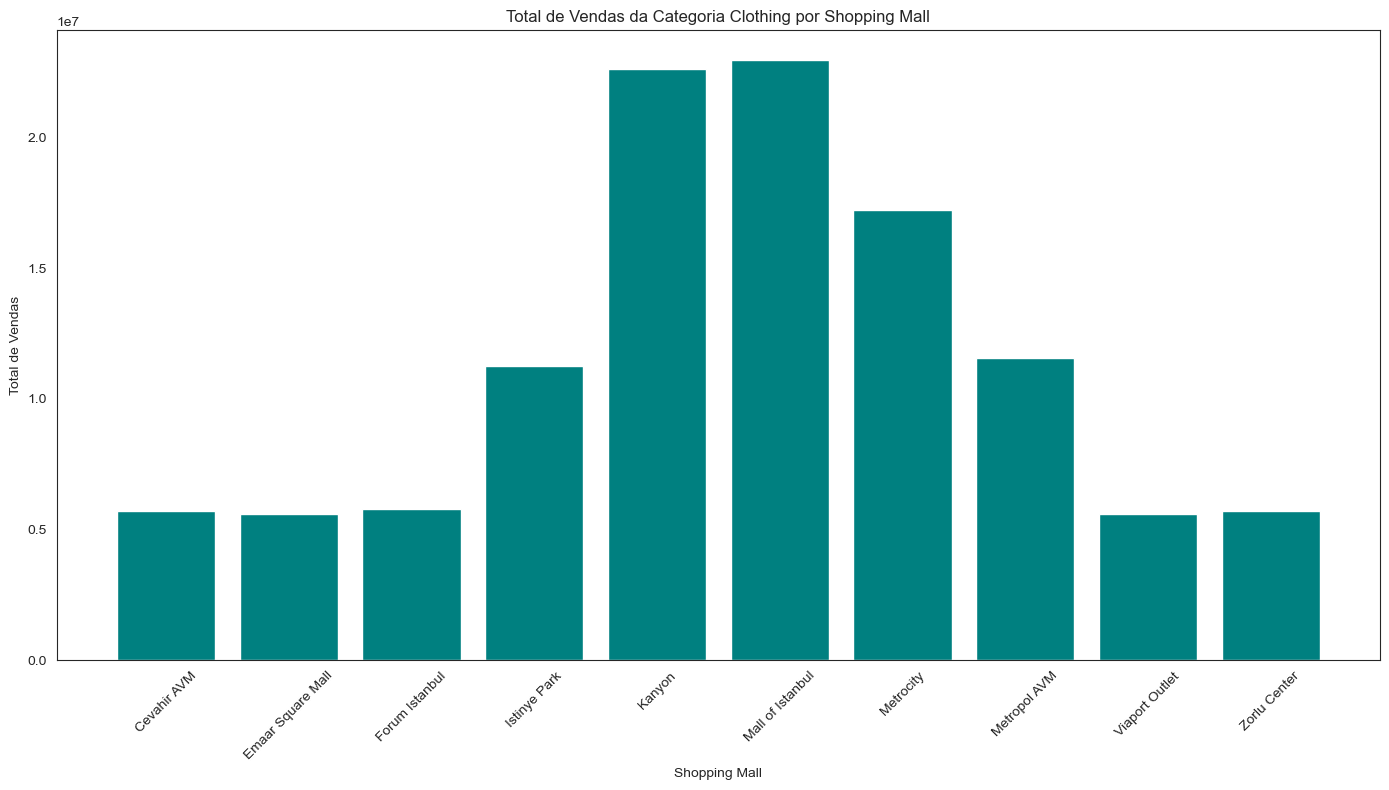

In [53]:
# Calcular o total de vendas por item
df['total_sales'] = df['quantity'] * df['price']

# Agrupar os dados por shopping mall e categoria, e somar as vendas
sales_by_mall_category = df.groupby(['shopping_mall', 'category'])['total_sales'].sum()

# Identificar a categoria com maior venda para cada shopping mall
top_category_by_mall = sales_by_mall_category.groupby(level=0).idxmax()

# Calcular as vendas totais para a categoria mais vendida em cada shopping mall
total_sales_top_category = sales_by_mall_category.loc[top_category_by_mall]

# Preparar dados para o gráfico
malls = total_sales_top_category.index.get_level_values(0)
sales = total_sales_top_category.values

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(malls, sales, color='teal')
plt.title('Total de Vendas da Categoria Clothing por Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ID Costumer

customer_id
C137763    26250.0
C699580    26250.0
C110600    26250.0
C110625    26250.0
C211345    26250.0
C139344    26250.0
C700083    26250.0
C291511    26250.0
C291627    26250.0
C164347    26250.0
Name: total_sales, dtype: float64


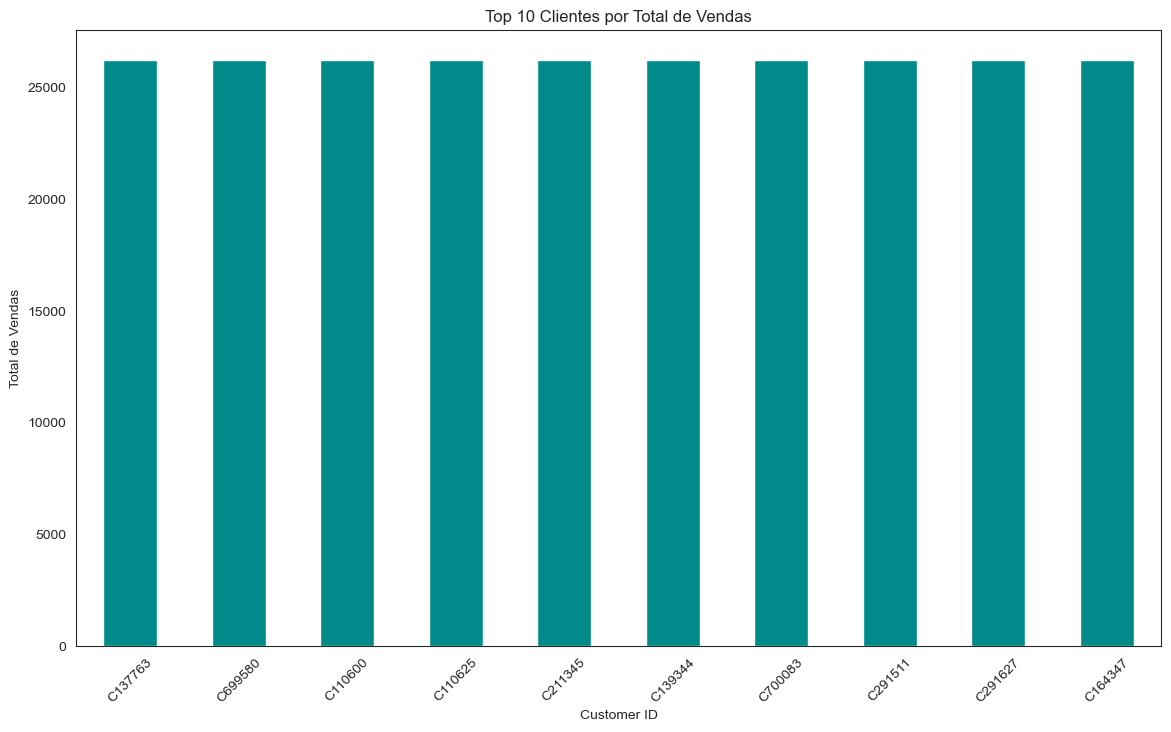

In [54]:
# Agrupar os dados por customer_id e somar as vendas
total_sales_by_customer = df.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False)

# Verificar os primeiros resultados para obter uma ideia dos valores
print(total_sales_by_customer.head(10))

# Criar um gráfico de barras para visualizar os top 10 clientes com maiores vendas
plt.figure(figsize=(14, 8))
total_sales_by_customer.head(10).plot(kind='bar', color='darkcyan')
plt.title('Top 10 Clientes por Total de Vendas')
plt.xlabel('Customer ID')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

count    99457.000000
mean      2528.789268
std       4222.475781
min          5.230000
25%        136.350000
50%        600.170000
75%       2700.720000
max      26250.000000
Name: total_sales, dtype: float64


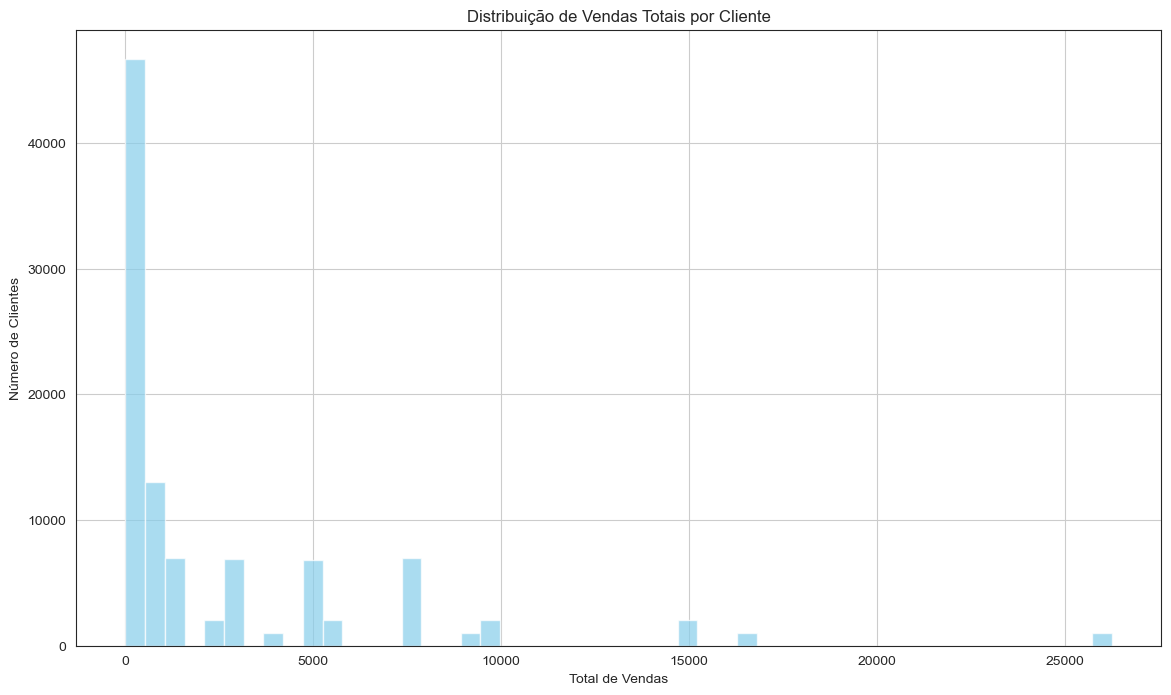

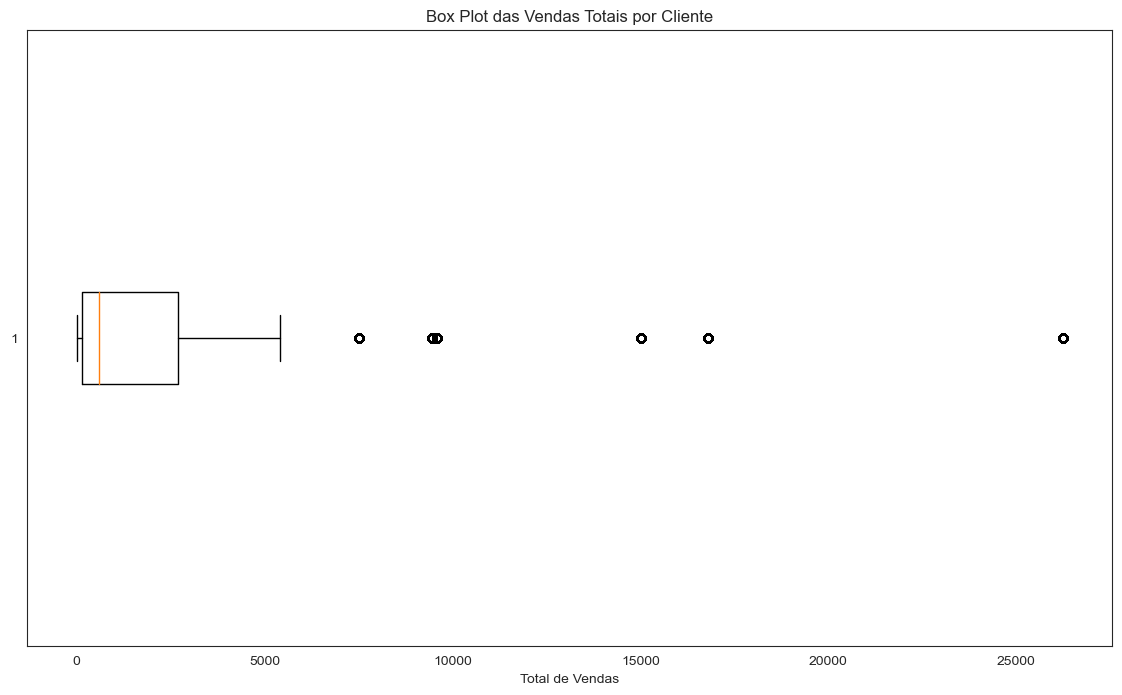

In [55]:
# Estatísticas descritivas das vendas totais por cliente
print(total_sales_by_customer.describe())

# Histograma das vendas totais por cliente
plt.figure(figsize=(14, 8))
plt.hist(total_sales_by_customer, bins=50, color='skyblue', alpha=0.7)
plt.title('Distribuição de Vendas Totais por Cliente')
plt.xlabel('Total de Vendas')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()

# Gráfico de caixa para visualizar a dispersão das vendas
plt.figure(figsize=(14, 8))
plt.boxplot(total_sales_by_customer, vert=False)
plt.title('Box Plot das Vendas Totais por Cliente')
plt.xlabel('Total de Vendas')
plt.show()

**** Aqui está o resultado mostrando o total de vendas por Customer ID. Os 10 clientes com maiores vendas têm exatamente o mesmo total de vendas, que é 26.250. O gráfico de barras acima ilustra isso visualmente.
Análise Gráfica
Histograma: Mostra uma distribuição altamente inclinada à direita, onde a maioria dos clientes tem vendas relativamente baixas, com poucos clientes apresentando vendas muito altas.
Box Plot: Indica uma grande quantidade de outliers, o que sugere que algumas compras são excepcionalmente mais altas do que a média. A linha dentro da caixa no box plot representa a mediana, e os pontos além das linhas (whiskers) representam os outliers.
Esses dados mostram que, embora existam clientes com compras muito altas, a maioria dos clientes gasta uma quantidade bem mais moderada. Isso pode indicar oportunidades para aumentar as vendas entre os clientes com gastos médios e baixos. Se você precisar de mais análises específicas ou tiver alguma outra questão, fico à disposição para ajudar

## Frequently Bought Together

In [56]:
# Transform the dataset for market basket analysis
basket = (df.groupby(['invoice_no', 'category'])['quantity'].sum()
          .unstack().reset_index().fillna(0).set_index('invoice_no'))

In [57]:
# Display the transformed basket dataframe to check the result
basket.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
invoice_no,,,,,,,,
I100008,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
I100014,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
I100015,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
I100024,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I100027,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [58]:
#We are getting the quantity ordered (example : 48,24,126) while we just want to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)

In [59]:
# this looks good as everything is ecnoded into 0 and 1
basket.head(10)

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
invoice_no,,,,,,,,
I100008,0,1,0,0,0,0,0,0
I100014,0,0,1,0,0,0,0,0
I100015,0,1,0,0,0,0,0,0
I100024,1,0,0,0,0,0,0,0
I100027,0,0,0,0,0,0,1,0
I100028,0,1,0,0,0,0,0,0
I100031,0,0,0,1,0,0,0,0
I100033,0,0,0,1,0,0,0,0
I100037,0,1,0,0,0,0,0,0


# Apriori 

In [60]:
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

In [61]:
!pip install mlxtend

In [62]:
df.set_index('invoice_no', inplace=True)

# Converter todas as entradas para booleanos
df = df.applymap(lambda x: x > 0 if type(x) == int else False)


In [63]:
# Agora aplicar o algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Imprimir as regras geradas
print("Número de regras geradas:", len(rules))
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Número de regras geradas: 12
    antecedents   consequents   support  confidence  lift
0    (quantity)         (age)  1.000000    1.000000   1.0
1         (age)    (quantity)  1.000000    1.000000   1.0
2  (gender_int)         (age)  0.401932    1.000000   1.0
3         (age)  (gender_int)  0.401932    0.401932   1.0
4  (gender_int)    (quantity)  0.401932    1.000000   1.0


In [64]:
# Aplicar o algoritmo Apriori para encontrar os itemsets frequentes
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Gerar as regras de associação
df_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Agora df_rules está definido e contém as regras de associação
print(df_rules.head())

    antecedents   consequents  antecedent support  consequent support  \
0    (quantity)         (age)            1.000000            1.000000   
1         (age)    (quantity)            1.000000            1.000000   
2  (gender_int)         (age)            0.401932            1.000000   
3         (age)  (gender_int)            1.000000            0.401932   
4  (gender_int)    (quantity)            0.401932            1.000000   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  1.000000    1.000000   1.0       0.0         inf            0.0  
1  1.000000    1.000000   1.0       0.0         inf            0.0  
2  0.401932    1.000000   1.0       0.0         inf            0.0  
3  0.401932    0.401932   1.0       0.0         1.0            0.0  
4  0.401932    1.000000   1.0       0.0         inf            0.0  


### Creating the function

In [65]:
def frequently_bought_together(item_name):
    item_set = frozenset([item_name])
    relevant_rules = rules[(rules['antecedents'] == item_set) | (rules['consequents'] == item_set)]
    items_together = set()
    for idx, row in relevant_rules.iterrows():
        combined_items = row['antecedents'] | row['consequents']
        combined_items.remove(item_set)
        items_together.update(combined_items)
    return list(items_together)

In [66]:
def generate_association_rules(df, min_support=0.01, min_confidence=0.1):
    """
    Generates association rules from a given DataFrame using the Apriori algorithm.

    Parameters:
        df (pd.DataFrame): DataFrame where each column is an item and each row represents whether the item was purchased (True/False).
        min_support (float): The minimum support of the itemsets returned. Default is 0.01.
        min_confidence (float): Minimum confidence for the rules returned. Default is 0.1.

    Returns:
        pd.DataFrame: DataFrame containing the association rules including metrics like support, confidence, and lift.
    """
    # Check if the DataFrame contains only boolean or binary values
    if not df.isin([0, 1, True, False]).all().all():
        raise ValueError("DataFrame should only contain boolean or binary values.")
    
    # Applying the Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    
    # Generating association rules
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
    
    return rules

# Usage example (assuming df is your pre-processed DataFrame):
# rules = generate_association_rules(df)
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

In [67]:
rules = generate_association_rules(df, min_support=0.005, min_confidence=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

               antecedents             consequents   support  confidence  lift
0               (quantity)                   (age)  1.000000    1.000000   1.0
1                    (age)              (quantity)  1.000000    1.000000   1.0
2             (gender_int)                   (age)  0.401932    1.000000   1.0
3                    (age)            (gender_int)  0.401932    0.401932   1.0
4             (gender_int)              (quantity)  0.401932    1.000000   1.0
5               (quantity)            (gender_int)  0.401932    0.401932   1.0
6   (gender_int, quantity)                   (age)  0.401932    1.000000   1.0
7        (gender_int, age)              (quantity)  0.401932    1.000000   1.0
8          (quantity, age)            (gender_int)  0.401932    0.401932   1.0
9             (gender_int)         (quantity, age)  0.401932    1.000000   1.0
10              (quantity)       (gender_int, age)  0.401932    0.401932   1.0
11                   (age)  (gender_int, quantity)  

In [68]:
# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Exibir algumas regras para validação
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

              antecedents consequents   support  confidence  lift
0              (quantity)       (age)  1.000000         1.0   1.0
1                   (age)  (quantity)  1.000000         1.0   1.0
2            (gender_int)       (age)  0.401932         1.0   1.0
3            (gender_int)  (quantity)  0.401932         1.0   1.0
4  (gender_int, quantity)       (age)  0.401932         1.0   1.0


In [69]:
def frequently_bought_together(item):
    
    # df of item passed
    item_df = basket.loc[basket[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [70]:
# Example 1
frequently_bought_together('Clothing')

Items frequently bought together with Clothing


C:\Users\karik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([], dtype=object)

In [71]:
# Example 2
frequently_bought_together('Cosmetics')

Items frequently bought together with Cosmetics


C:\Users\karik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([], dtype=object)

In [72]:
# Example 1
frequently_bought_together('Food & Beverage')

Items frequently bought together with Food & Beverage


C:\Users\karik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([], dtype=object)

In [73]:
df.columns

Index(['customer_id', 'gender', 'age', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'gender_int',
       'total_sales', 'AgeRange', 'age_group', 'month_year', 'total_sale',
       'quarter'],
      dtype='object')

### Validation

In [74]:
def validate_rules(rules, min_lift=1.0, min_confidence=0.1):
    valid_rules = rules[(rules['lift'] >= min_lift) & (rules['confidence'] >= min_confidence)]
    return valid_rules.sort_values(by=['support', 'confidence', 'lift'], ascending=False)

# Exemplo de uso
validated_rules = validate_rules(rules, min_lift=1.2, min_confidence=0.2)
print(validated_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [75]:
# For a sample, we will try out visualization techniques on Wooden Star df which we used earlier

support=df_rules.support.values
confidence=df_rules.confidence.values

In [76]:
import networkx as nx

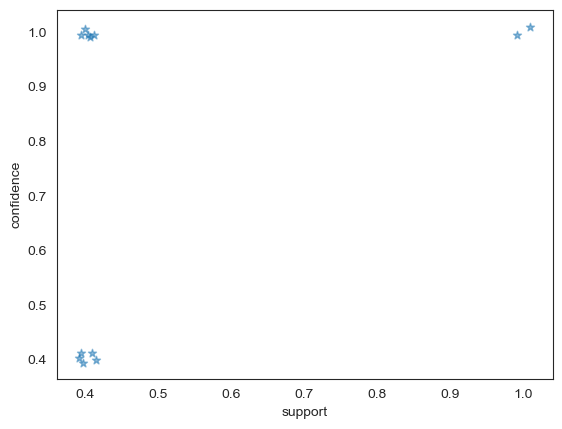

In [77]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence    
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [78]:
def df_graph(df_rules, no_of_rules):
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)    
    strs = ['R'+str(i) for i in range(no_of_rules)]
    
    for i in range(no_of_rules):      
        # Adicionando nós para cada regra
        G1.add_nodes_from(["R"+str(i)])
        
        # Adicionando antecedentes aos nós 
        for a in df_rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        
        # Adicionando consequentes aos nós
        for c in df_rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # Ajustar a posição dos rótulos
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()


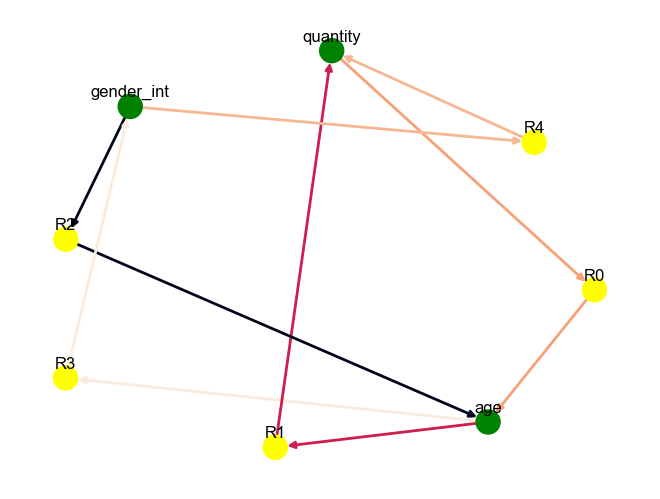

In [79]:
df_graph(df_rules,5)

In [80]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def visualize_rules(item, no_of_rules):
    # Filtra as regras que contêm o item de interesse nos antecedentes ou consequentes
    filtered_rules = rules[rules['antecedents'].apply(lambda x: item in x) | rules['consequents'].apply(lambda x: item in x)]
    
    if filtered_rules.empty:
        print(f"No rules found for item: {item}")
        return
    
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R'+str(i) for i in range(no_of_rules)]
    
    # Certifique-se de que no_of_rules não exceda o número de regras disponíveis
    no_of_rules = min(no_of_rules, len(filtered_rules))
    
    for i in range(no_of_rules):
        # Adicionando nós para cada regra
        G1.add_nodes_from(["R"+str(i)])
        
        # Adicionando antecedentes aos nós
        for a in filtered_rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        
        # Adicionando consequentes aos nós
        for c in filtered_rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i], weight=2)
    
    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
    
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)
    
    for p in pos:  # Ajustar a posição dos rótulos
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

# Exemplo de uso
visualize_rules('Clothing', 4)

No rules found for item: Clothing


In [81]:
# Exemplo de uso
visualize_rules('Clothing', 4)

No rules found for item: Clothing


### Trending Items

In [82]:
# Verificar e converter a coluna 'invoice_date' para datetime, corrigindo valores inválidos
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Verificar novamente os tipos de dados
print(df.dtypes)

customer_id                 bool
gender                      bool
age                         bool
category                    bool
quantity                    bool
price                       bool
payment_method              bool
invoice_date      datetime64[ns]
shopping_mall               bool
gender_int                  bool
total_sales                 bool
AgeRange                    bool
age_group                   bool
month_year                  bool
total_sale                  bool
quarter                     bool
dtype: object


In [83]:
# Adicionar uma coluna de ano e mês
df['year_month'] = df['invoice_date'].dt.to_period('M')

# Agregar a quantidade de itens vendidos por categoria e por mês
monthly_sales = df.groupby(['year_month', 'category']).agg({'quantity': 'sum'}).reset_index()

# Pivotar o DataFrame para ter categorias como colunas e meses como índices
monthly_sales_pivot = monthly_sales.pivot(index='year_month', columns='category', values='quantity').fillna(0)

# Verificar os dados agregados
print("Monthly Sales Pivot Table:")
print(monthly_sales_pivot.head())

Monthly Sales Pivot Table:
Empty DataFrame
Columns: []
Index: []


In [84]:
# Calcular a mudança na frequência de cada item de um mês para o próximo
monthly_sales_pivot_diff = monthly_sales_pivot.diff().fillna(0)

# Verificar os dados de diferenciação
print("Monthly Sales Difference Table:")
print(monthly_sales_pivot_diff.head())


Monthly Sales Difference Table:
Empty DataFrame
Columns: []
Index: []


In [85]:
# Identificar itens em tendência (aqueles com aumento na frequência)
trending_items = monthly_sales_pivot_diff[monthly_sales_pivot_diff > 0].stack().reset_index()
trending_items.columns = ['year_month', 'category', 'quantity_increase']

# Verificar os itens em tendência
print("Trending Items:")
print(trending_items.head())

Trending Items:
Empty DataFrame
Columns: [year_month, category, quantity_increase]
Index: []


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


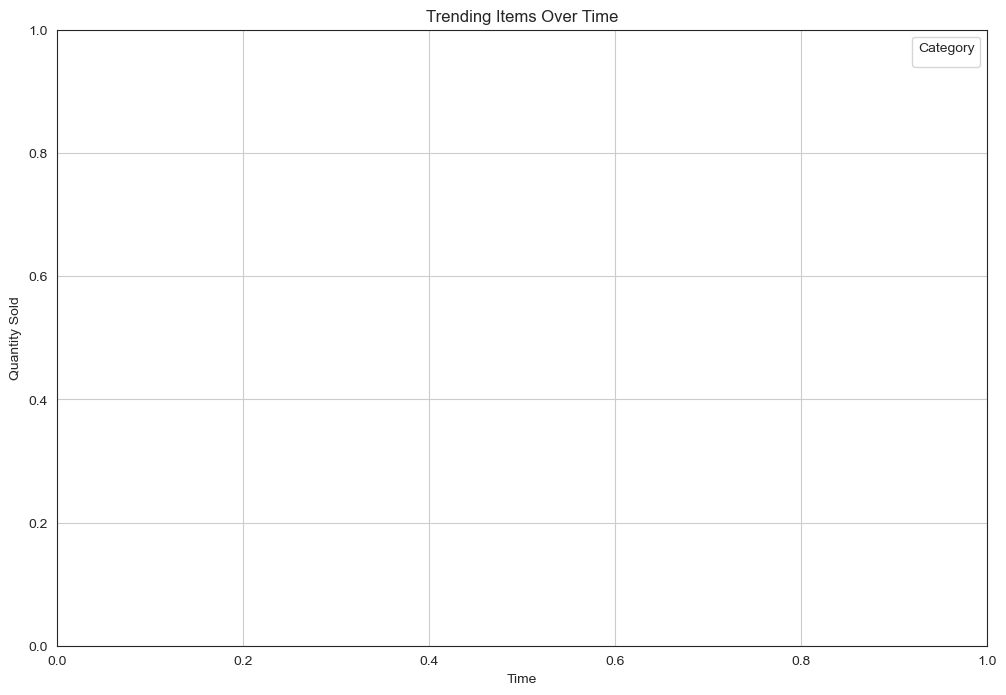

In [86]:
# Classificar por maior aumento na quantidade
trending_items = trending_items.sort_values(by='quantity_increase', ascending=False)

# Visualização dos itens em tendência
plt.figure(figsize=(12, 8))
for category in trending_items['category'].unique():
    plt.plot(monthly_sales_pivot.index, monthly_sales_pivot[category], label=category)

plt.title('Trending Items Over Time')
plt.xlabel('Time')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# RECOMENDATION SYSTEM

In [87]:
# Import Pandas
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import numpy as np

In [88]:
data = pd.read_csv('books_data.csv')

C:\Users\karik\AppData\Local\Temp\ipykernel_14960\4214914736.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('books_data.csv')


In [89]:
# Print the firsts rows
data.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,ISBN.1,Book-Rating,User-ID.1,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,276725,034545104X,0,1.0,"nyc, new york, usa",NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276726,0155061224,5,2.0,"stockton, california, usa",18.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,276727,0446520802,0,3.0,"moscow, yukon territory, russia",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,276729,052165615X,3,4.0,"porto, v.n.gaia, portugal",17.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,276729,0521795028,6,5.0,"farnborough, hants, united kingdom",NaN
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,276733,2080674722,0,6.0,"santa monica, california, usa",61.0
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,276736,3257224281,8,7.0,"washington, dc, usa",NaN
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,276737,0600570967,6,8.0,"timmins, ontario, canada",NaN
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,276744,038550120X,7,9.0,"germantown, tennessee, usa",NaN
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,276745,342310538,10,10.0,"albacete, wisconsin, spain",26.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 271360 non-null   object 
 1   Book-Title           271360 non-null   object 
 2   Book-Author          271359 non-null   object 
 3   Year-Of-Publication  271360 non-null   object 
 4   Publisher            271358 non-null   object 
 5   Image-URL-S          271360 non-null   object 
 6   Image-URL-M          271360 non-null   object 
 7   Image-URL-L          271357 non-null   object 
 8   User-ID              1048575 non-null  int64  
 9   ISBN.1               1048575 non-null  object 
 10  Book-Rating          1048575 non-null  int64  
 11  User-ID.1            278858 non-null   float64
 12  Location             278858 non-null   object 
 13  Age                  168096 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 

In [91]:
data.shape

(1048575, 14)

In [92]:
data.isna().sum()

ISBN                   777215
Book-Title             777215
Book-Author            777216
Year-Of-Publication    777215
Publisher              777217
Image-URL-S            777215
Image-URL-M            777215
Image-URL-L            777218
User-ID                     0
ISBN.1                      0
Book-Rating                 0
User-ID.1              769717
Location               769717
Age                    880479
dtype: int64

In [93]:
data.describe()

,User-ID,Book-Rating,User-ID.1,Age
count,1.048575e+06,1.048575e+06,278858.00000,168096.000000
mean,1.285089e+05,2.879907e+00,139429.50000,34.751434
std,7.421876e+04,3.857870e+00,80499.51502,14.428097
min,2.000000e+00,0.000000e+00,1.00000,0.000000
25%,6.339400e+04,0.000000e+00,69715.25000,24.000000
50%,1.288350e+05,0.000000e+00,139429.50000,32.000000
75%,1.927790e+05,7.000000e+00,209143.75000,44.000000
max,2.788540e+05,1.000000e+01,278858.00000,244.000000


In [94]:
data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'ISBN.1',
       'Book-Rating', 'User-ID.1', 'Location', 'Age'],
      dtype='object')

In [95]:
# Handle NaN values in the 'Book-Title' column
data['Book-Title'] = data['Book-Title'].fillna('missing')

In [96]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,ISBN.1,Book-Rating,User-ID.1,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,276725,034545104X,0,1.0,"nyc, new york, usa",NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276726,0155061224,5,2.0,"stockton, california, usa",18.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,276727,0446520802,0,3.0,"moscow, yukon territory, russia",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,276729,052165615X,3,4.0,"porto, v.n.gaia, portugal",17.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,276729,0521795028,6,5.0,"farnborough, hants, united kingdom",NaN


#### Calculate rating

In [97]:
data_v = data.groupby('ISBN')['Book-Rating'].count().reset_index()
data['vote_count'] = data_v['Book-Rating']

data_R = data.groupby('ISBN')['Book-Rating'].mean().reset_index()
data['vote_average'] = data_R['Book-Rating']

data_C = data['Book-Rating'].mean()

data_m = data['vote_count'].quantile(0.9)

In [98]:
data.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,ISBN.1,Book-Rating,User-ID.1,Location,Age,vote_count,vote_average
790830,NaN,missing,NaN,NaN,NaN,NaN,NaN,NaN,190925,0688177751,0,NaN,NaN,NaN,NaN,NaN
795176,NaN,missing,NaN,NaN,NaN,NaN,NaN,NaN,192245,0684832291,0,NaN,NaN,NaN,NaN,NaN
519244,NaN,missing,NaN,NaN,NaN,NaN,NaN,NaN,125698,0425153789,10,NaN,NaN,NaN,NaN,NaN
867351,NaN,missing,NaN,NaN,NaN,NaN,NaN,NaN,209756,0802139256,0,NaN,NaN,NaN,NaN,NaN
673199,NaN,missing,NaN,NaN,NaN,NaN,NaN,NaN,163761,0552144738,6,NaN,NaN,NaN,NaN,NaN


In [99]:
# data for recommendation system
data_rs = data.loc[data['vote_count'] >= data_m]

In [100]:
data_rs.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,ISBN.1,Book-Rating,User-ID.1,Location,Age,vote_count,vote_average
32077,061819679X,Paddington Helps Out: Revised Edition,Michael Bond,2002,Houghton Mifflin,http://images.amazon.com/images/P/061819679X.0...,http://images.amazon.com/images/P/061819679X.0...,http://images.amazon.com/images/P/061819679X.0...,7346,052594527X,0,32078.0,"liberal, missouri, usa",17.0,1.0,8.0
189879,0312874596,Keep Australia on Your Left: A True Story of a...,Eric Stiller,2002,Forge,http://images.amazon.com/images/P/0312874596.0...,http://images.amazon.com/images/P/0312874596.0...,http://images.amazon.com/images/P/0312874596.0...,41837,0394831241,0,189880.0,"poulsbo, washington, usa",NaN,1.0,0.0
203145,0517880008,My First Car,James Lecesne,1993,Random House Inc,http://images.amazon.com/images/P/0517880008.0...,http://images.amazon.com/images/P/0517880008.0...,http://images.amazon.com/images/P/0517880008.0...,46290,1890208299,0,203146.0,"iowa city, iowa, usa",22.0,1.0,7.0
266083,0373311818,"Ugly Duckling (Harlequin Regency Romance, No 3...",Brenda Hiatt,1992.0,Harlequin,http://images.amazon.com/images/P/0373311818.0...,http://images.amazon.com/images/P/0373311818.0...,http://images.amazon.com/images/P/0373311818.0...,61619,014023313X,0,266084.0,"london, england, united kingdom",23.0,1.0,0.0
198471,0967834503,Bit at Large,Theron L. Gibbons,2000,Elucid Press,http://images.amazon.com/images/P/0967834503.0...,http://images.amazon.com/images/P/0967834503.0...,http://images.amazon.com/images/P/0967834503.0...,44252,0312195516,10,198472.0,"valencia, valencia, spain",24.0,1.0,8.0


In [101]:
def weighted_rating(data_rs, m=data_m, C=data_C):
    v = data_rs['vote_count'] 
    R = data_rs['vote_average']
    # Calculation based on the IMDB formulareturn (v/(v+m) *R) + (m/(m+v) *C)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [102]:
data_rs['weighted_rating'] = data_rs.apply(weighted_rating, axis=1)

C:\Users\karik\AppData\Local\Temp\ipykernel_14960\1441225896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rs['weighted_rating'] = data_rs.apply(weighted_rating, axis=1)


In [103]:
# Calculate mean of vote average column
C = data['vote_average'].mean()
print(C)

2.972239829009434


In [104]:
# Calculate the total sum of vote counts
m = data['vote_count'].sum()
print(m)


#print(total_sum)

271360.0


In [105]:
# Calculate the minimum number of votes required to be in the chart, m
m = data['vote_count'].quantile(0.90)
print(m)

1.0


In [106]:
# Filter out all qualified movies into a new DataFrame
q_book = data.copy().loc[data['vote_count'] >= m]
q_book.shape

(271360, 16)

In [107]:
data.shape

(1048575, 16)

In [108]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)

In [109]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_book['score'] = q_book.apply(weighted_rating, axis = 1)

TOP 20 BOOKS

In [110]:
# Sort movies based on score calculated above
q_book = q_book.sort_values('score', ascending = False)

# Print top 20 movies
q_book[['Book-Title', 'vote_count', 'vote_average', 'score']].head(20)

,Book-Title,vote_count,vote_average,score
191564,Cecil Beaton: A Biography,1.0,10.0,6.48612
183573,Brigitte. Die neue Gymnastik.,1.0,10.0,6.48612
86310,Le Probleme Avec Jane,1.0,10.0,6.48612
183523,A Lady of Fortune,1.0,10.0,6.48612
86290,Jane Austen: The Complete Novels,1.0,10.0,6.48612
183532,Feuersee. Die vergessenen Reiche. Fantasy- Roman.,1.0,10.0,6.48612
183534,The Complete Idiot's Travel Guide to Hawaii (C...,1.0,10.0,6.48612
47162,The Best Medicine,1.0,10.0,6.48612
86288,UN Annee En Provence,1.0,10.0,6.48612
47164,The Healing Touch,1.0,10.0,6.48612


### Content-Based Recommender

In [111]:
data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'ISBN.1',
       'Book-Rating', 'User-ID.1', 'Location', 'Age', 'vote_count',
       'vote_average'],
      dtype='object')

In [112]:
# Print plot overviews of the first 10 movies.
data['Book-Title'].head(10)

0                                  Classical Mythology
1                                         Clara Callan
2                                 Decision in Normandy
3    Flu: The Story of the Great Influenza Pandemic...
4                               The Mummies of Urumchi
5                               The Kitchen God's Wife
6    What If?: The World's Foremost Military Histor...
7                                      PLEADING GUILTY
8    Under the Black Flag: The Romance and the Real...
9              Where You'll Find Me: And Other Stories
Name: Book-Title, dtype: object

In [113]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['Book-Title'] = data['Book-Title'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['Book-Title'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# This code segment prepares the text data from the 'overview' column of the 'metadata' DataFrame for further analysis 
# by converting it into a numerical representation using TF-IDF vectorization.

(1048575, 78462)

In [114]:
# Array mapping from feature integer indices to feature name.
# In this code snippet, the [5000:5010] slice is used to get the feature names for the indices between 5000 and 5010 (exclusive).
tfidf.get_feature_names_out()[5000:5010]

array(['ai', 'aia', 'aias', 'aickman', 'aid', 'aida', 'aidan', 'aide',
       'aided', 'aider'], dtype=object)

In [115]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix[:10000], tfidf_matrix[:10000])

In [116]:
cosine_sim.shape

(10000, 10000)

In [117]:
cosine_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

Definindo a função...

In [118]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(data.index, index=data['Book-Title']).drop_duplicates()

In [119]:
indices[:10]

Book-Title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

In [120]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['Book-Title'].iloc[movie_indices]

### Book , Author, Publisher, and Age Based Recommender

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [122]:
data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'ISBN.1',
       'Book-Rating', 'User-ID.1', 'Location', 'Age', 'vote_count',
       'vote_average'],
      dtype='object')

Keeping the necessary columns

In [123]:
data = data[['Book-Title','Age', 'Book-Author', 'Publisher']]

In [124]:
data.head()

,Book-Title,Age,Book-Author,Publisher
0,Classical Mythology,NaN,Mark P. O. Morford,Oxford University Press
1,Clara Callan,18.0,Richard Bruce Wright,HarperFlamingo Canada
2,Decision in Normandy,NaN,Carlo D'Este,HarperPerennial
3,Flu: The Story of the Great Influenza Pandemic...,17.0,Gina Bari Kolata,Farrar Straus Giroux
4,The Mummies of Urumchi,NaN,E. J. W. Barber,W. W. Norton &amp; Company


Null values

In [125]:
data.isnull().sum()

Book-Title          0
Age            880479
Book-Author    777216
Publisher      777217
dtype: int64

In [126]:
data.dropna(axis=0, inplace=True)

In [127]:
data.isnull().sum()

Book-Title     0
Age            0
Book-Author    0
Publisher      0
dtype: int64

Accounting for spaces between the word

In [128]:
# Garantir que cada valor é uma string
data["Book-Title"] = data["Book-Title"].astype(str)
data["Book-Author"] = data["Book-Author"].astype(str)
data["Age"] = data["Age"].astype(str)
data["Publisher"] = data["Publisher"].astype(str)

In [129]:
def collapse(text):
    l=[]
    l.append(text.replace(" ", ""))
    return l

In [130]:
data["Book-Title"]=data["Book-Title"].apply(collapse)
data["Book-Author"]=data["Book-Author"].apply(collapse)
data["Age"]=data["Age"].apply(collapse)
data["Publisher"]=data["Publisher"].apply(collapse)

In [131]:
data.head()

,Book-Title,Age,Book-Author,Publisher
1,[ClaraCallan],[18.0],[RichardBruceWright],[HarperFlamingoCanada]
3,[Flu:TheStoryoftheGreatInfluenzaPandemicof1918...,[17.0],[GinaBariKolata],[FarrarStrausGiroux]
5,[TheKitchenGod'sWife],[61.0],[AmyTan],[PutnamPubGroup]
9,[WhereYou'llFindMe:AndOtherStories],[26.0],[AnnBeattie],[Scribner]
10,[NightsBelowStationStreet],[14.0],[DavidAdamsRichards],[EmblemEditions]


Converting list to string

In [132]:
data["Book-Title"]=data["Book-Title"].apply(lambda x: " ".join(x))
data["Book-Author"]=data["Book-Author"].apply(lambda x: " ".join(x))
data["Age"]=data["Age"].apply(lambda x: " ".join(x))
data["Publisher"]=data["Publisher"].apply(lambda x: " ".join(x))

Merging the related columns to one column

In [133]:
data['book-details']=data["Book-Author"]+data["Age"]+data["Publisher"]
data.drop(columns=["Book-Author", "Age", "Publisher"], inplace=True)

Converting text to number

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english", max_features=10000, min_df=5, max_df=0.9)
vector = cv.fit_transform(data["book-details"])

In [135]:
vector.shape

(163452, 4579)

Building cosine similarity between the number array

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

# Supondo que 'data["book-details"]' contém os detalhes dos livros como texto
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(data["book-details"])

In [137]:
# Reset index of your main DataFrame and construct reverse mapping as before
data = data.reset_index()
indices = pd.Series(data.index, index=data['Book-Title'])

In [138]:
def book_recommendation_system(book_title):
    book_title=book_title.replace(" ", "")
    index=data[data["Book-Title"]==book_title].index[0]
    distance=sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    for i in distance[1:6]:
        print(data.iloc[i[0]]["Book-Title"])

In [139]:
def book_recommendation_system(book_title, data, similarity):
    # Standardize the input title to match the dataset formatting
    book_title = book_title.replace(" ", "").lower()
    matches = data[data["Book-Title"].str.replace(" ", "").str.lower() == book_title]
    
    if matches.empty:
        print("No matches found. Please check the title and try again.")
        return
    
    index = matches.index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distance[1:6]:
        print(data.iloc[i[0]]["Book-Title"])

In [140]:

# Example Data
data = pd.DataFrame({
    'Book-Title': ['Pleading Guilty', 'Book Two', 'Book Three', 'Book Four', 'Book Five'],
    'Author': ['Author A', 'Author B', 'Author C', 'Author D', 'Author E']
})

# Normalize and prepare titles similarly to how your function expects
data['Book-Title'] = data['Book-Title'].str.replace(" ", "").str.lower()

# Dummy similarity matrix
similarity = np.random.rand(5, 5)  # Random similarities between books

In [141]:
# Function definition
def book_recommendation_system(book_title, data, similarity):
    book_title = book_title.replace(" ", "").lower()
    matches = data[data['Book-Title'] == book_title]
    
    if matches.empty:
        print("No matches found. Please check the title and try again.")
        return
    
    index = matches.index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distance[1:6]:
        print(data.iloc[i[0]]['Book-Title'])

# Call the function
book_recommendation_system("PLEADING GUILTY", data, similarity)

bookfive
bookthree
booktwo
pleadingguilty


## Collaborative Filtering

In [148]:
data.columns

Index(['Book-Title', 'Author'], dtype='object')

In [149]:
# Load the u.data file into a dataframe
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

In [150]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = ratings.copy()
y = ratings['User-ID.1']

# Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'ratings' is not defined